In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statistics

from scipy import stats

In [109]:
find_inter_thres_300 = pd.read_csv('proc_find_inter_thres_300.csv')

del find_inter_thres_300['Unnamed: 0']

In [3]:
find_inter_thres_300

,rep,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,...,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95,1.0
0,0,210.0,280.0,281.0,288.0,281.0,284.0,286.0,279.0,291.0,...,298.0,298.0,300.0,300.0,300.0,300.0,300.0,300.0,300.0,300.0
1,1,225.0,280.0,280.0,292.0,284.0,286.0,284.0,287.0,281.0,...,298.0,300.0,300.0,300.0,300.0,300.0,300.0,300.0,300.0,300.0
2,2,217.0,284.0,288.0,285.0,287.0,277.0,285.0,282.0,291.0,...,300.0,299.0,300.0,300.0,300.0,300.0,300.0,300.0,300.0,300.0
3,3,217.0,274.0,289.0,289.0,284.0,284.0,285.0,285.0,289.0,...,297.0,300.0,300.0,300.0,300.0,300.0,300.0,300.0,300.0,300.0
4,4,227.0,285.0,290.0,293.0,282.0,285.0,284.0,291.0,287.0,...,296.0,299.0,300.0,300.0,300.0,300.0,300.0,300.0,300.0,300.0
5,5,215.0,276.0,293.0,277.0,285.0,278.0,286.0,289.0,281.0,...,297.0,300.0,300.0,300.0,300.0,300.0,300.0,300.0,300.0,300.0
6,6,220.0,278.0,290.0,290.0,286.0,283.0,285.0,280.0,297.0,...,299.0,298.0,300.0,300.0,300.0,300.0,300.0,300.0,300.0,300.0
7,7,211.0,273.0,293.0,289.0,283.0,278.0,283.0,287.0,288.0,...,300.0,300.0,300.0,300.0,300.0,300.0,300.0,300.0,300.0,300.0
8,8,218.0,279.0,287.0,289.0,284.0,282.0,284.0,285.0,291.0,...,299.0,300.0,300.0,300.0,300.0,300.0,300.0,300.0,300.0,300.0
9,9,216.0,276.0,290.0,288.0,283.0,287.0,287.0,291.0,289.0,...,298.0,300.0,300.0,300.0,300.0,300.0,300.0,300.0,300.0,300.0


In [4]:
find_inter_thres_500 = pd.read_csv('proc_find_inter_thres_500.csv')

del find_inter_thres_500['Unnamed: 0']

In [5]:
find_inter_thres_500

,rep,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,...,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95,1.0
0,0,413.000000,476.333333,489.000000,477.666667,470.333333,474.666667,469.666667,469.333333,485.333333,...,498.333333,499.666667,500.000000,500.0,500.0,500.0,500.0,500.0,500.0,500.0
1,1,415.333333,470.666667,483.333333,477.000000,478.333333,471.000000,473.666667,471.333333,487.333333,...,498.333333,500.000000,500.000000,500.0,500.0,500.0,500.0,500.0,500.0,500.0
2,2,408.000000,478.333333,483.000000,474.000000,476.333333,465.666667,474.000000,469.666667,487.666667,...,497.000000,499.333333,499.666667,500.0,500.0,500.0,500.0,500.0,500.0,500.0
3,3,412.666667,485.000000,484.666667,477.666667,468.666667,467.666667,469.666667,476.333333,485.000000,...,497.666667,500.000000,500.000000,500.0,500.0,500.0,500.0,500.0,500.0,500.0
4,4,416.666667,478.000000,479.333333,477.666667,481.333333,465.333333,467.666667,474.000000,491.333333,...,498.333333,499.000000,500.000000,500.0,500.0,500.0,500.0,500.0,500.0,500.0
5,5,421.333333,484.666667,482.333333,482.333333,465.666667,473.666667,470.666667,475.666667,491.666667,...,497.666667,498.333333,499.666667,500.0,500.0,500.0,500.0,500.0,500.0,500.0
6,6,410.000000,482.666667,486.333333,474.333333,474.000000,469.666667,467.000000,474.333333,488.333333,...,499.000000,499.333333,500.000000,500.0,500.0,500.0,500.0,500.0,500.0,500.0
7,7,417.000000,475.333333,482.333333,478.333333,473.333333,470.666667,471.666667,471.333333,482.333333,...,497.666667,499.333333,500.000000,500.0,500.0,500.0,500.0,500.0,500.0,500.0
8,8,417.333333,478.333333,486.333333,477.666667,472.333333,476.000000,471.666667,476.000000,487.000000,...,498.000000,499.333333,500.000000,500.0,500.0,500.0,500.0,500.0,500.0,500.0
9,9,419.333333,482.333333,483.333333,482.333333,475.333333,464.333333,468.666667,478.333333,480.333333,...,497.333333,499.333333,500.000000,500.0,500.0,500.0,500.0,500.0,500.0,500.0


In [6]:
find_inter_thres_1000 = pd.read_csv('proc_find_inter_thres_1000.csv')

del find_inter_thres_1000['Unnamed: 0']

In [7]:
find_inter_thres_1000

,rep,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,...,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95,1.0
0,0,911.0,969.0,961.0,934.0,943.0,942.0,945.0,957.0,983.0,...,998.0,997.0,999.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0
1,1,888.0,970.0,950.0,949.0,939.0,933.0,934.0,950.0,971.0,...,996.0,995.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0
2,2,915.0,988.0,958.0,939.0,948.0,939.0,941.0,934.0,962.0,...,996.0,998.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0
3,3,909.0,977.0,961.0,941.0,933.0,950.0,942.0,944.0,978.0,...,992.0,999.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0
4,4,916.0,970.0,966.0,938.0,950.0,933.0,933.0,960.0,967.0,...,997.0,998.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0
5,5,903.0,971.0,975.0,957.0,939.0,938.0,935.0,945.0,965.0,...,998.0,998.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0
6,6,915.0,953.0,959.0,938.0,934.0,933.0,945.0,938.0,978.0,...,992.0,997.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0
7,7,923.0,963.0,969.0,954.0,936.0,932.0,936.0,947.0,975.0,...,995.0,996.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0
8,8,926.0,969.0,961.0,961.0,945.0,937.0,923.0,958.0,973.0,...,1000.0,999.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0
9,9,923.0,958.0,960.0,948.0,948.0,926.0,947.0,939.0,964.0,...,991.0,999.0,999.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0


In [8]:
rep5_04_002_data = pd.read_csv('proc_rep5_04_002.csv')

del rep5_04_002_data['Unnamed: 0']

In [9]:
rep5_04_002_data

,rep,intra_thres,init_intra_edge,init_supp_edge,fin_intra_edge,fin_supp_edge,alive_nodes,tot_isol_node,tot_unsupp_node,cas_steps,...,step32_isol,step32_unsupp,step33_isol,step33_unsupp,step34_isol,step34_unsupp,step35_isol,step35_unsupp,step36_isol,step36_unsupp
0,1,0.040,612.0,500.0,0.0,0.0,0,846,54,3,...,0,0,0,0,0,0,0,0,0,0
1,1,0.040,612.0,500.0,0.0,0.0,0,854,46,5,...,0,0,0,0,0,0,0,0,0,0
2,1,0.040,612.0,500.0,0.0,0.0,0,480,420,12,...,0,0,0,0,0,0,0,0,0,0
3,1,0.040,612.0,500.0,0.0,0.0,0,520,380,11,...,0,0,0,0,0,0,0,0,0,0
4,2,0.040,624.0,500.0,1.0,3.0,4,855,41,4,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,99,0.078,2239.5,500.0,1468.5,1870.5,804,2,94,3,...,0,0,0,0,0,0,0,0,0,0
396,100,0.078,2338.0,500.0,1580.5,1977.5,794,6,100,4,...,0,0,0,0,0,0,0,0,0,0
397,100,0.078,2338.0,500.0,1603.5,2003.5,800,6,94,4,...,0,0,0,0,0,0,0,0,0,0
398,100,0.078,2338.0,500.0,1506.5,1906.5,800,1,99,3,...,0,0,0,0,0,0,0,0,0,0


In [10]:
att30_rep5_04_002_data = pd.read_csv('proc_buldy_RGG_30_rep5_04_002.csv')

del att30_rep5_04_002_data['Unnamed: 0']

In [11]:
att30_rep5_04_002_data

,rep,intra_thres,init_intra_edge,init_supp_edge,fin_intra_edge,fin_supp_edge,alive_nodes,tot_isol_node,tot_unsupp_node,cas_steps,...,step22_isol,step22_unsupp,step23_isol,step23_unsupp,step24_isol,step24_unsupp,step25_isol,step25_unsupp,step26_isol,step26_unsupp
0,1,0.040,221.5,300.0,0.0,0.0,0,518,22,4,...,0,0,0,0,0,0,0,0,0,0
1,1,0.040,221.5,300.0,0.0,0.0,0,515,25,4,...,0,0,0,0,0,0,0,0,0,0
2,1,0.040,221.5,300.0,0.0,0.0,0,463,77,5,...,0,0,0,0,0,0,0,0,0,0
3,1,0.040,221.5,300.0,0.0,0.0,0,458,82,5,...,0,0,0,0,0,0,0,0,0,0
4,2,0.040,211.0,300.0,0.0,0.0,0,521,19,3,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,249,0.138,2375.5,300.0,1550.0,1792.0,484,0,56,2,...,0,0,0,0,0,0,0,0,0,0
996,250,0.138,2300.5,300.0,1549.5,1789.5,480,0,60,2,...,0,0,0,0,0,0,0,0,0,0
997,250,0.138,2300.5,300.0,1511.5,1752.5,482,0,58,2,...,0,0,0,0,0,0,0,0,0,0
998,250,0.138,2300.5,300.0,1465.0,1705.0,480,0,60,2,...,0,0,0,0,0,0,0,0,0,0


In [12]:
buldy_RGG_rep30_03_0005 = pd.read_csv('proc_buldy_RGG_rep30_03_0005.csv')

del buldy_RGG_rep30_03_0005['Unnamed: 0']

In [13]:
buldy_RGG_rep30_03_0005

,rep,intra_thres,init_intra_edge,init_supp_edge,fin_intra_edge,fin_supp_edge,alive_nodes,tot_isol_node,tot_unsupp_node,cas_steps,...,step48_isol,step48_unsupp,step49_isol,step49_unsupp,step50_isol,step50_unsupp,step51_isol,step51_unsupp,step52_isol,step52_unsupp
0,1,0.0300,373.0,500.0,0.0,0.0,0,871,29,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,0.0300,373.0,500.0,0.0,0.0,0,875,25,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,0.0300,373.0,500.0,0.0,0.0,0,704,196,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,0.0300,373.0,500.0,0.0,0.0,0,672,228,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2,0.0300,329.5,500.0,0.0,0.0,0,881,19,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,2999,0.0795,2271.0,500.0,1477.5,1880.5,806,1,93,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11996,3000,0.0795,2312.0,500.0,1601.5,1996.5,790,8,102,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11997,3000,0.0795,2312.0,500.0,1588.0,1987.0,798,7,95,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11998,3000,0.0795,2312.0,500.0,1483.5,1885.5,804,1,95,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
buldy_RGG_100_rep30_03_0005 = pd.read_csv('proc_buldy_RGG_100_rep30_03_0005.csv')

del buldy_RGG_100_rep30_03_0005['Unnamed: 0']

In [15]:
buldy_RGG_100_rep30_03_0005

,rep,intra_thres,init_intra_edge,init_supp_edge,fin_intra_edge,fin_supp_edge,alive_nodes,tot_isol_node,tot_unsupp_node,cas_steps,...,step54_isol,step54_unsupp,step55_isol,step55_unsupp,step56_isol,step56_unsupp,step57_isol,step57_unsupp,step58_isol,step58_unsupp
0,1,0.0300,346.0,500.0,0.0,0.0,0,783,17,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,0.0300,346.0,500.0,0.0,0.0,0,778,22,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,0.0300,346.0,500.0,0.0,0.0,0,733,67,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,0.0300,346.0,500.0,0.0,0.0,0,735,65,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2,0.0300,342.5,500.0,0.0,0.0,0,776,24,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,2999,0.0795,2273.0,500.0,950.5,1273.5,646,1,153,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11996,3000,0.0795,2314.5,500.0,1066.5,1367.5,602,10,188,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11997,3000,0.0795,2314.5,500.0,1.0,3.0,4,328,468,12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11998,3000,0.0795,2314.5,500.0,897.5,1205.5,616,1,183,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
buldy_RGG_200_rep30_03_0005 = pd.read_csv('proc_buldy_RGG_200_rep30_03_0005.csv')

del buldy_RGG_200_rep30_03_0005['Unnamed: 0']

In [17]:
buldy_RGG_200_rep30_03_0005

,rep,intra_thres,init_intra_edge,init_supp_edge,fin_intra_edge,fin_supp_edge,alive_nodes,tot_isol_node,tot_unsupp_node,cas_steps,...,step34_isol,step34_unsupp,step35_isol,step35_unsupp,step36_isol,step36_unsupp,step37_isol,step37_unsupp,step38_isol,step38_unsupp
0,1,0.0300,360.0,500.0,0.0,0.0,0,581,19,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,0.0300,360.0,500.0,0.0,0.0,0,580,20,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,0.0300,360.0,500.0,0.0,0.0,0,571,29,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,0.0300,360.0,500.0,0.0,0.0,0,577,23,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2,0.0300,346.0,500.0,0.0,0.0,0,579,21,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,2999,0.0795,2287.5,500.0,198.5,338.5,280,33,287,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11996,3000,0.0795,2354.5,500.0,1.0,3.0,4,247,349,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11997,3000,0.0795,2354.5,500.0,1.0,3.0,4,247,349,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11998,3000,0.0795,2354.5,500.0,210.5,349.5,278,22,300,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
buldy_RGG_200_rep30_035_0006 = pd.read_csv('proc_buldy_RGG_200_rep30_035_0006.csv')

del buldy_RGG_200_rep30_035_0006['Unnamed: 0']

In [19]:
buldy_RGG_200_rep30_035_0006

,rep,intra_thres,init_intra_edge,init_supp_edge,fin_intra_edge,fin_supp_edge,alive_nodes,tot_isol_node,tot_unsupp_node,cas_steps,...,step59_isol,step59_unsupp,step60_isol,step60_unsupp,step61_isol,step61_unsupp,step62_isol,step62_unsupp,step63_isol,step63_unsupp
0,1,0.0350,485.0,500.0,0.0,0.0,0,565,35,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,0.0350,485.0,500.0,0.0,0.0,0,571,29,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,0.0350,485.0,500.0,0.0,0.0,0,535,65,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,0.0350,485.0,500.0,0.0,0.0,0,547,53,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2,0.0350,467.5,500.0,0.0,0.0,0,576,24,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,2999,0.0944,3153.5,500.0,406.0,584.0,356,1,243,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11996,3000,0.0944,3268.0,500.0,167.5,229.5,124,163,313,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11997,3000,0.0944,3268.0,500.0,0.0,0.0,0,215,385,9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11998,3000,0.0944,3268.0,500.0,355.5,513.5,316,4,280,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
buldy_RGG_30_rep30_04_0007 = pd.read_csv('proc_buldy_RGG_30_rep30_04_0007.csv')

del buldy_RGG_30_rep30_04_0007['Unnamed: 0']

In [21]:
buldy_RGG_30_rep30_04_0007

,rep,intra_thres,init_intra_edge,init_supp_edge,fin_intra_edge,fin_supp_edge,alive_nodes,tot_isol_node,tot_unsupp_node,cas_steps,...,step39_isol,step39_unsupp,step40_isol,step40_unsupp,step41_isol,step41_unsupp,step42_isol,step42_unsupp,step43_isol,step43_unsupp
0,1,0.0400,208.5,300.0,0.0,0.0,0,511,29,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,0.0400,208.5,300.0,0.0,0.0,0,511,29,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,0.0400,208.5,300.0,0.0,0.0,0,429,111,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,0.0400,208.5,300.0,0.0,0.0,0,417,123,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2,0.0400,193.5,300.0,0.0,0.0,0,524,16,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,2999,0.1035,1398.5,300.0,911.5,1153.5,484,0,56,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11996,3000,0.1035,1341.5,300.0,949.5,1190.5,482,0,58,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11997,3000,0.1035,1341.5,300.0,945.5,1189.5,488,1,51,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11998,3000,0.1035,1341.5,300.0,857.5,1098.5,482,0,58,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
buldy_RGG_1000_rep30_02_0005 = pd.read_csv('proc_buldy_RGG_1000_rep30_02_0005.csv')

del buldy_RGG_1000_rep30_02_0005['Unnamed: 0']

In [23]:
buldy_RGG_1000_rep30_02_0005

,rep,intra_thres,init_intra_edge,init_supp_edge,fin_intra_edge,fin_supp_edge,alive_nodes,tot_isol_node,tot_unsupp_node,cas_steps,...,step113_isol,step113_unsupp,step114_isol,step114_unsupp,step115_isol,step115_unsupp,step116_isol,step116_unsupp,step117_isol,step117_unsupp
0,1,0.0200,605.5,1000,0.0,0.0,0,1778,22,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,0.0200,605.5,1000,0.0,0.0,0,1779,21,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,0.0200,605.5,1000,0.0,0.0,0,1726,74,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,0.0200,605.5,1000,0.0,0.0,0,1741,59,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2,0.0200,621.0,1000,0.0,0.0,0,1773,27,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9595,2399,0.0595,5254.5,1000,3492.0,4305.0,1626,0,174,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9596,2400,0.0595,5253.5,1000,3764.5,4569.5,1610,1,189,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9597,2400,0.0595,5253.5,1000,3783.0,4594.0,1622,1,177,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9598,2400,0.0595,5253.5,1000,3370.5,4176.5,1612,0,188,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
buldy_RGG_50_rep100_045 = pd.read_csv('proc_buldy_RGG_50_rep100_045.csv')

del buldy_RGG_50_rep100_045['Unnamed: 0']

In [25]:
buldy_RGG_50_rep100_045

,rep,intra_thres,init_intra_edge,init_supp_edge,fin_intra_edge,fin_supp_edge,alive_nodes,tot_isol_node,tot_unsupp_node,cas_steps,...,step34_far_dead_node,step35_isol,step35_unsupp,step35_far_dead_node,step36_isol,step36_unsupp,step36_far_dead_node,step37_isol,step37_unsupp,step37_far_dead_node
0,1,0.045,788.5,500.0,0.0,0.0,0,795,105,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,0.045,788.5,500.0,0.0,0.0,0,773,127,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,0.045,788.5,500.0,335.0,612.0,554,133,213,11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,0.045,788.5,500.0,291.0,536.0,490,171,239,14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2,0.045,792.5,500.0,0.0,0.0,0,840,60,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,99,0.045,732.0,500.0,0.0,0.0,0,476,324,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
396,100,0.045,718.0,500.0,0.0,0.0,0,720,80,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
397,100,0.045,718.0,500.0,0.0,0.0,0,728,72,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
398,100,0.045,718.0,500.0,0.0,0.0,0,469,331,9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
buldy_RGG_50_rep100_067 = pd.read_csv('proc_buldy_RGG_50_rep100_067.csv')

del buldy_RGG_50_rep100_067['Unnamed: 0']

In [27]:
buldy_RGG_50_rep100_067

,rep,intra_thres,init_intra_edge,init_supp_edge,fin_intra_edge,fin_supp_edge,alive_nodes,tot_isol_node,tot_unsupp_node,cas_steps,...,step19_far_dead_node,step20_isol,step20_unsupp,step20_far_dead_node,step21_isol,step21_unsupp,step21_far_dead_node,step22_isol,step22_unsupp,step22_far_dead_node
0,1,0.067,1623.0,500,1033.0,1402.0,738,49,113,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,0.067,1623.0,500,989.0,1345.0,712,62,126,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,0.067,1623.0,500,1056.5,1459.5,806,2,92,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,0.067,1623.0,500,1110.0,1519.0,818,1,81,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2,0.067,1704.5,500,1.0,3.0,4,404,492,14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,99,0.067,1729.0,500,1106.0,1502.0,792,7,101,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
396,100,0.067,1636.5,500,1070.0,1457.0,774,14,112,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
397,100,0.067,1636.5,500,1.0,3.0,4,401,495,14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
398,100,0.067,1636.5,500,1051.5,1447.5,792,5,103,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
rgg_rgg_data = rep5_04_002_data.copy()
rgg_rand_data = rep5_04_002_data.copy()
rand_rgg_data = rep5_04_002_data.copy()
rand_rand_data = rep5_04_002_data.copy()

rgg_rgg_drop_list = []
rgg_rand_drop_list = []
rand_rgg_drop_list = []
rand_rand_drop_list = []

for i in range(400):
    if i % 4 == 0:
        rgg_rand_drop_list.append(i)
        rand_rgg_drop_list.append(i)
        rand_rand_drop_list.append(i)
    elif i % 4 == 1:
        rgg_rgg_drop_list.append(i)
        rand_rgg_drop_list.append(i)
        rand_rand_drop_list.append(i)
    elif i % 4 == 2:
        rgg_rgg_drop_list.append(i)
        rgg_rand_drop_list.append(i)
        rand_rand_drop_list.append(i)
    elif i % 4 == 3:
        rgg_rgg_drop_list.append(i)
        rgg_rand_drop_list.append(i)
        rand_rgg_drop_list.append(i)       

rgg_rgg_data = rgg_rgg_data.drop(rgg_rgg_drop_list)
rgg_rand_data = rgg_rand_data.drop(rgg_rand_drop_list)
rand_rgg_data = rand_rgg_data.drop(rand_rgg_drop_list)
rand_rand_data = rand_rand_data.drop(rand_rand_drop_list)

rgg_rgg_data = rgg_rgg_data.reset_index(drop=True)
rgg_rand_data = rgg_rand_data.reset_index(drop=True)
rand_rgg_data = rand_rgg_data.reset_index(drop=True)
rand_rand_data = rand_rand_data.reset_index(drop=True)

In [29]:
rgg_rgg_data

,rep,intra_thres,init_intra_edge,init_supp_edge,fin_intra_edge,fin_supp_edge,alive_nodes,tot_isol_node,tot_unsupp_node,cas_steps,...,step32_isol,step32_unsupp,step33_isol,step33_unsupp,step34_isol,step34_unsupp,step35_isol,step35_unsupp,step36_isol,step36_unsupp
0,1,0.040,612.0,500.0,0.0,0.0,0,846,54,3,...,0,0,0,0,0,0,0,0,0,0
1,2,0.040,624.0,500.0,1.0,3.0,4,855,41,4,...,0,0,0,0,0,0,0,0,0,0
2,3,0.040,594.5,500.0,0.0,0.0,0,858,42,4,...,0,0,0,0,0,0,0,0,0,0
3,4,0.040,577.5,500.0,0.0,0.0,0,852,48,3,...,0,0,0,0,0,0,0,0,0,0
4,5,0.040,591.0,500.0,0.0,0.0,0,835,65,3,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,0.078,2277.5,500.0,1452.5,1821.5,738,40,122,4,...,0,0,0,0,0,0,0,0,0,0
96,97,0.078,2254.5,500.0,1399.0,1766.0,734,37,129,4,...,0,0,0,0,0,0,0,0,0,0
97,98,0.078,2216.5,500.0,1528.5,1925.5,794,6,100,4,...,0,0,0,0,0,0,0,0,0,0
98,99,0.078,2239.5,500.0,1572.0,1970.0,796,5,99,4,...,0,0,0,0,0,0,0,0,0,0


In [30]:
rgg_rgg_2_data = att30_rep5_04_002_data.copy()
rgg_rand_2_data = att30_rep5_04_002_data.copy()
rand_rgg_2_data = att30_rep5_04_002_data.copy()
rand_rand_2_data = att30_rep5_04_002_data.copy()

rgg_rgg_drop_list = []
rgg_rand_drop_list = []
rand_rgg_drop_list = []
rand_rand_drop_list = []

for i in range(1000):
    if i % 4 == 0:
        rgg_rand_drop_list.append(i)
        rand_rgg_drop_list.append(i)
        rand_rand_drop_list.append(i)
    elif i % 4 == 1:
        rgg_rgg_drop_list.append(i)
        rand_rgg_drop_list.append(i)
        rand_rand_drop_list.append(i)
    elif i % 4 == 2:
        rgg_rgg_drop_list.append(i)
        rgg_rand_drop_list.append(i)
        rand_rand_drop_list.append(i)
    elif i % 4 == 3:
        rgg_rgg_drop_list.append(i)
        rgg_rand_drop_list.append(i)
        rand_rgg_drop_list.append(i)       

rgg_rgg_2_data = rgg_rgg_2_data.drop(rgg_rgg_drop_list)
rgg_rand_2_data = rgg_rand_2_data.drop(rgg_rand_drop_list)
rand_rgg_2_data = rand_rgg_2_data.drop(rand_rgg_drop_list)
rand_rand_2_data = rand_rand_2_data.drop(rand_rand_drop_list)

rgg_rgg_2_data = rgg_rgg_2_data.reset_index(drop=True)
rgg_rand_2_data = rgg_rand_2_data.reset_index(drop=True)
rand_rgg_2_data = rand_rgg_2_data.reset_index(drop=True)
rand_rand_2_data = rand_rand_2_data.reset_index(drop=True)

In [31]:
rgg_rgg_2_data

,rep,intra_thres,init_intra_edge,init_supp_edge,fin_intra_edge,fin_supp_edge,alive_nodes,tot_isol_node,tot_unsupp_node,cas_steps,...,step22_isol,step22_unsupp,step23_isol,step23_unsupp,step24_isol,step24_unsupp,step25_isol,step25_unsupp,step26_isol,step26_unsupp
0,1,0.040,221.5,300.0,0.0,0.0,0,518,22,4,...,0,0,0,0,0,0,0,0,0,0
1,2,0.040,211.0,300.0,0.0,0.0,0,521,19,3,...,0,0,0,0,0,0,0,0,0,0
2,3,0.040,229.5,300.0,0.0,0.0,0,515,25,4,...,0,0,0,0,0,0,0,0,0,0
3,4,0.040,215.0,300.0,0.0,0.0,0,522,18,3,...,0,0,0,0,0,0,0,0,0,0
4,5,0.040,231.5,300.0,1.0,3.0,4,521,15,3,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,246,0.138,2345.0,300.0,1652.0,1894.0,484,0,56,2,...,0,0,0,0,0,0,0,0,0,0
246,247,0.138,2353.5,300.0,1612.0,1854.0,484,0,56,2,...,0,0,0,0,0,0,0,0,0,0
247,248,0.138,2371.5,300.0,1648.0,1888.0,480,0,60,2,...,0,0,0,0,0,0,0,0,0,0
248,249,0.138,2375.5,300.0,1659.5,1899.5,480,0,60,2,...,0,0,0,0,0,0,0,0,0,0


In [32]:
buldy_RGG_rep30_03_0005_rgg_rgg_data = buldy_RGG_rep30_03_0005.copy()
buldy_RGG_rep30_03_0005_rgg_rand_data = buldy_RGG_rep30_03_0005.copy()
buldy_RGG_rep30_03_0005_rand_rgg_data = buldy_RGG_rep30_03_0005.copy()
buldy_RGG_rep30_03_0005_rand_rand_data = buldy_RGG_rep30_03_0005.copy()

rgg_rgg_drop_list = []
rgg_rand_drop_list = []
rand_rgg_drop_list = []
rand_rand_drop_list = []

for i in range(12000):
    if i % 4 == 0:
        rgg_rand_drop_list.append(i)
        rand_rgg_drop_list.append(i)
        rand_rand_drop_list.append(i)
    elif i % 4 == 1:
        rgg_rgg_drop_list.append(i)
        rand_rgg_drop_list.append(i)
        rand_rand_drop_list.append(i)
    elif i % 4 == 2:
        rgg_rgg_drop_list.append(i)
        rgg_rand_drop_list.append(i)
        rand_rand_drop_list.append(i)
    elif i % 4 == 3:
        rgg_rgg_drop_list.append(i)
        rgg_rand_drop_list.append(i)
        rand_rgg_drop_list.append(i)       

buldy_RGG_rep30_03_0005_rgg_rgg_data = buldy_RGG_rep30_03_0005_rgg_rgg_data.drop(rgg_rgg_drop_list)
buldy_RGG_rep30_03_0005_rgg_rand_data = buldy_RGG_rep30_03_0005_rgg_rand_data.drop(rgg_rand_drop_list)
buldy_RGG_rep30_03_0005_rand_rgg_data = buldy_RGG_rep30_03_0005_rand_rgg_data.drop(rand_rgg_drop_list)
buldy_RGG_rep30_03_0005_rand_rand_data = buldy_RGG_rep30_03_0005_rand_rand_data.drop(rand_rand_drop_list)

buldy_RGG_rep30_03_0005_rgg_rgg_data = buldy_RGG_rep30_03_0005_rgg_rgg_data.reset_index(drop=True)
buldy_RGG_rep30_03_0005_rgg_rand_data = buldy_RGG_rep30_03_0005_rgg_rand_data.reset_index(drop=True)
buldy_RGG_rep30_03_0005_rand_rgg_data = buldy_RGG_rep30_03_0005_rand_rgg_data.reset_index(drop=True)
buldy_RGG_rep30_03_0005_rand_rand_data = buldy_RGG_rep30_03_0005_rand_rand_data.reset_index(drop=True)

In [33]:
buldy_RGG_rep30_03_0005_rgg_rgg_data

,rep,intra_thres,init_intra_edge,init_supp_edge,fin_intra_edge,fin_supp_edge,alive_nodes,tot_isol_node,tot_unsupp_node,cas_steps,...,step48_isol,step48_unsupp,step49_isol,step49_unsupp,step50_isol,step50_unsupp,step51_isol,step51_unsupp,step52_isol,step52_unsupp
0,1,0.0300,373.0,500.0,0.0,0.0,0,871,29,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,0.0300,329.5,500.0,0.0,0.0,0,881,19,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,0.0300,334.0,500.0,0.0,0.0,0,882,18,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,0.0300,357.0,500.0,0.0,0.0,0,876,24,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,0.0300,349.5,500.0,0.0,0.0,0,879,21,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2996,0.0795,2334.5,500.0,1557.0,1940.0,766,20,114,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2996,2997,0.0795,2320.5,500.0,1615.5,2010.5,790,8,102,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2997,2998,0.0795,2360.5,500.0,1626.5,2025.5,798,3,99,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2998,2999,0.0795,2271.0,500.0,1604.0,2006.0,804,2,94,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
buldy_RGG_100_rep30_03_0005_rgg_rgg_data = buldy_RGG_100_rep30_03_0005.copy()
buldy_RGG_100_rep30_03_0005_rgg_rand_data = buldy_RGG_100_rep30_03_0005.copy()
buldy_RGG_100_rep30_03_0005_rand_rgg_data = buldy_RGG_100_rep30_03_0005.copy()
buldy_RGG_100_rep30_03_0005_rand_rand_data = buldy_RGG_100_rep30_03_0005.copy()

rgg_rgg_drop_list = []
rgg_rand_drop_list = []
rand_rgg_drop_list = []
rand_rand_drop_list = []

for i in range(12000):
    if i % 4 == 0:
        rgg_rand_drop_list.append(i)
        rand_rgg_drop_list.append(i)
        rand_rand_drop_list.append(i)
    elif i % 4 == 1:
        rgg_rgg_drop_list.append(i)
        rand_rgg_drop_list.append(i)
        rand_rand_drop_list.append(i)
    elif i % 4 == 2:
        rgg_rgg_drop_list.append(i)
        rgg_rand_drop_list.append(i)
        rand_rand_drop_list.append(i)
    elif i % 4 == 3:
        rgg_rgg_drop_list.append(i)
        rgg_rand_drop_list.append(i)
        rand_rgg_drop_list.append(i)       

buldy_RGG_100_rep30_03_0005_rgg_rgg_data = buldy_RGG_100_rep30_03_0005_rgg_rgg_data.drop(rgg_rgg_drop_list)
buldy_RGG_100_rep30_03_0005_rgg_rand_data = buldy_RGG_100_rep30_03_0005_rgg_rand_data.drop(rgg_rand_drop_list)
buldy_RGG_100_rep30_03_0005_rand_rgg_data = buldy_RGG_100_rep30_03_0005_rand_rgg_data.drop(rand_rgg_drop_list)
buldy_RGG_100_rep30_03_0005_rand_rand_data = buldy_RGG_100_rep30_03_0005_rand_rand_data.drop(rand_rand_drop_list)

buldy_RGG_100_rep30_03_0005_rgg_rgg_data = buldy_RGG_100_rep30_03_0005_rgg_rgg_data.reset_index(drop=True)
buldy_RGG_100_rep30_03_0005_rgg_rand_data = buldy_RGG_100_rep30_03_0005_rgg_rand_data.reset_index(drop=True)
buldy_RGG_100_rep30_03_0005_rand_rgg_data = buldy_RGG_100_rep30_03_0005_rand_rgg_data.reset_index(drop=True)
buldy_RGG_100_rep30_03_0005_rand_rand_data = buldy_RGG_100_rep30_03_0005_rand_rand_data.reset_index(drop=True)

In [35]:
buldy_RGG_100_rep30_03_0005_rgg_rgg_data

,rep,intra_thres,init_intra_edge,init_supp_edge,fin_intra_edge,fin_supp_edge,alive_nodes,tot_isol_node,tot_unsupp_node,cas_steps,...,step54_isol,step54_unsupp,step55_isol,step55_unsupp,step56_isol,step56_unsupp,step57_isol,step57_unsupp,step58_isol,step58_unsupp
0,1,0.0300,346.0,500.0,0.0,0.0,0,783,17,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,0.0300,342.5,500.0,0.0,0.0,0,776,24,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,0.0300,343.5,500.0,0.0,0.0,0,779,21,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,0.0300,351.0,500.0,0.0,0.0,0,780,20,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,0.0300,339.5,500.0,0.0,0.0,0,785,15,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2996,0.0795,2301.0,500.0,1047.5,1350.5,606,9,185,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2996,2997,0.0795,2297.5,500.0,425.0,581.0,312,154,334,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2997,2998,0.0795,2324.0,500.0,67.5,105.5,76,331,393,16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2998,2999,0.0795,2273.0,500.0,975.0,1265.0,580,20,200,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
buldy_RGG_200_rep30_03_0005_rgg_rgg_data = buldy_RGG_200_rep30_03_0005.copy()
buldy_RGG_200_rep30_03_0005_rgg_rand_data = buldy_RGG_200_rep30_03_0005.copy()
buldy_RGG_200_rep30_03_0005_rand_rgg_data = buldy_RGG_200_rep30_03_0005.copy()
buldy_RGG_200_rep30_03_0005_rand_rand_data = buldy_RGG_200_rep30_03_0005.copy()

rgg_rgg_drop_list = []
rgg_rand_drop_list = []
rand_rgg_drop_list = []
rand_rand_drop_list = []

for i in range(12000):
    if i % 4 == 0:
        rgg_rand_drop_list.append(i)
        rand_rgg_drop_list.append(i)
        rand_rand_drop_list.append(i)
    elif i % 4 == 1:
        rgg_rgg_drop_list.append(i)
        rand_rgg_drop_list.append(i)
        rand_rand_drop_list.append(i)
    elif i % 4 == 2:
        rgg_rgg_drop_list.append(i)
        rgg_rand_drop_list.append(i)
        rand_rand_drop_list.append(i)
    elif i % 4 == 3:
        rgg_rgg_drop_list.append(i)
        rgg_rand_drop_list.append(i)
        rand_rgg_drop_list.append(i)       

buldy_RGG_200_rep30_03_0005_rgg_rgg_data = buldy_RGG_200_rep30_03_0005_rgg_rgg_data.drop(rgg_rgg_drop_list)
buldy_RGG_200_rep30_03_0005_rgg_rand_data = buldy_RGG_200_rep30_03_0005_rgg_rand_data.drop(rgg_rand_drop_list)
buldy_RGG_200_rep30_03_0005_rand_rgg_data = buldy_RGG_200_rep30_03_0005_rand_rgg_data.drop(rand_rgg_drop_list)
buldy_RGG_200_rep30_03_0005_rand_rand_data = buldy_RGG_200_rep30_03_0005_rand_rand_data.drop(rand_rand_drop_list)

buldy_RGG_200_rep30_03_0005_rgg_rgg_data = buldy_RGG_200_rep30_03_0005_rgg_rgg_data.reset_index(drop=True)
buldy_RGG_200_rep30_03_0005_rgg_rand_data = buldy_RGG_200_rep30_03_0005_rgg_rand_data.reset_index(drop=True)
buldy_RGG_200_rep30_03_0005_rand_rgg_data = buldy_RGG_200_rep30_03_0005_rand_rgg_data.reset_index(drop=True)
buldy_RGG_200_rep30_03_0005_rand_rand_data = buldy_RGG_200_rep30_03_0005_rand_rand_data.reset_index(drop=True)

In [37]:
buldy_RGG_200_rep30_03_0005_rgg_rgg_data

,rep,intra_thres,init_intra_edge,init_supp_edge,fin_intra_edge,fin_supp_edge,alive_nodes,tot_isol_node,tot_unsupp_node,cas_steps,...,step34_isol,step34_unsupp,step35_isol,step35_unsupp,step36_isol,step36_unsupp,step37_isol,step37_unsupp,step38_isol,step38_unsupp
0,1,0.0300,360.0,500.0,0.0,0.0,0,581,19,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,0.0300,346.0,500.0,0.0,0.0,0,579,21,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,0.0300,323.0,500.0,0.0,0.0,0,583,17,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,0.0300,363.0,500.0,0.0,0.0,0,581,19,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,0.0300,324.0,500.0,0.0,0.0,0,585,15,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2996,0.0795,2301.5,500.0,0.0,0.0,0,268,332,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2996,2997,0.0795,2308.5,500.0,0.0,0.0,0,318,282,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2997,2998,0.0795,2240.5,500.0,4.5,8.5,8,225,367,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2998,2999,0.0795,2287.5,500.0,0.0,0.0,0,211,389,9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
buldy_RGG_200_rep30_035_0006_rgg_rgg_data = buldy_RGG_200_rep30_035_0006.copy()
buldy_RGG_200_rep30_035_0006_rgg_rand_data = buldy_RGG_200_rep30_035_0006.copy()
buldy_RGG_200_rep30_035_0006_rand_rgg_data = buldy_RGG_200_rep30_035_0006.copy()
buldy_RGG_200_rep30_035_0006_rand_rand_data = buldy_RGG_200_rep30_035_0006.copy()

rgg_rgg_drop_list = []
rgg_rand_drop_list = []
rand_rgg_drop_list = []
rand_rand_drop_list = []

for i in range(12000):
    if i % 4 == 0:
        rgg_rand_drop_list.append(i)
        rand_rgg_drop_list.append(i)
        rand_rand_drop_list.append(i)
    elif i % 4 == 1:
        rgg_rgg_drop_list.append(i)
        rand_rgg_drop_list.append(i)
        rand_rand_drop_list.append(i)
    elif i % 4 == 2:
        rgg_rgg_drop_list.append(i)
        rgg_rand_drop_list.append(i)
        rand_rand_drop_list.append(i)
    elif i % 4 == 3:
        rgg_rgg_drop_list.append(i)
        rgg_rand_drop_list.append(i)
        rand_rgg_drop_list.append(i)       

buldy_RGG_200_rep30_035_0006_rgg_rgg_data = buldy_RGG_200_rep30_035_0006_rgg_rgg_data.drop(rgg_rgg_drop_list)
buldy_RGG_200_rep30_035_0006_rgg_rand_data = buldy_RGG_200_rep30_035_0006_rgg_rand_data.drop(rgg_rand_drop_list)
buldy_RGG_200_rep30_035_0006_rand_rgg_data = buldy_RGG_200_rep30_035_0006_rand_rgg_data.drop(rand_rgg_drop_list)
buldy_RGG_200_rep30_035_0006_rand_rand_data = buldy_RGG_200_rep30_035_0006_rand_rand_data.drop(rand_rand_drop_list)

buldy_RGG_200_rep30_035_0006_rgg_rgg_data = buldy_RGG_200_rep30_035_0006_rgg_rgg_data.reset_index(drop=True)
buldy_RGG_200_rep30_035_0006_rgg_rand_data = buldy_RGG_200_rep30_035_0006_rgg_rand_data.reset_index(drop=True)
buldy_RGG_200_rep30_035_0006_rand_rgg_data = buldy_RGG_200_rep30_035_0006_rand_rgg_data.reset_index(drop=True)
buldy_RGG_200_rep30_035_0006_rand_rand_data = buldy_RGG_200_rep30_035_0006_rand_rand_data.reset_index(drop=True)

In [39]:
buldy_RGG_200_rep30_035_0006_rgg_rgg_data

,rep,intra_thres,init_intra_edge,init_supp_edge,fin_intra_edge,fin_supp_edge,alive_nodes,tot_isol_node,tot_unsupp_node,cas_steps,...,step59_isol,step59_unsupp,step60_isol,step60_unsupp,step61_isol,step61_unsupp,step62_isol,step62_unsupp,step63_isol,step63_unsupp
0,1,0.0350,485.0,500.0,0.0,0.0,0,565,35,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,0.0350,467.5,500.0,0.0,0.0,0,576,24,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,0.0350,426.0,500.0,0.0,0.0,0,578,22,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,0.0350,440.0,500.0,0.0,0.0,0,578,22,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,0.0350,440.0,500.0,0.0,0.0,0,580,20,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2996,0.0944,3236.0,500.0,5.0,9.0,8,194,398,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2996,2997,0.0944,3158.5,500.0,16.5,27.5,22,166,412,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2997,2998,0.0944,3293.0,500.0,1.0,3.0,4,186,410,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2998,2999,0.0944,3153.5,500.0,0.0,0.0,0,173,427,9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
buldy_RGG_30_rep30_04_0007_rgg_rgg_data = buldy_RGG_30_rep30_04_0007.copy()
buldy_RGG_30_rep30_04_0007_rgg_rand_data = buldy_RGG_30_rep30_04_0007.copy()
buldy_RGG_30_rep30_04_0007_rand_rgg_data = buldy_RGG_30_rep30_04_0007.copy()
buldy_RGG_30_rep30_04_0007_rand_rand_data = buldy_RGG_30_rep30_04_0007.copy()

rgg_rgg_drop_list = []
rgg_rand_drop_list = []
rand_rgg_drop_list = []
rand_rand_drop_list = []

for i in range(12000):
    if i % 4 == 0:
        rgg_rand_drop_list.append(i)
        rand_rgg_drop_list.append(i)
        rand_rand_drop_list.append(i)
    elif i % 4 == 1:
        rgg_rgg_drop_list.append(i)
        rand_rgg_drop_list.append(i)
        rand_rand_drop_list.append(i)
    elif i % 4 == 2:
        rgg_rgg_drop_list.append(i)
        rgg_rand_drop_list.append(i)
        rand_rand_drop_list.append(i)
    elif i % 4 == 3:
        rgg_rgg_drop_list.append(i)
        rgg_rand_drop_list.append(i)
        rand_rgg_drop_list.append(i)       

buldy_RGG_30_rep30_04_0007_rgg_rgg_data = buldy_RGG_30_rep30_04_0007_rgg_rgg_data.drop(rgg_rgg_drop_list)
buldy_RGG_30_rep30_04_0007_rgg_rand_data = buldy_RGG_30_rep30_04_0007_rgg_rand_data.drop(rgg_rand_drop_list)
buldy_RGG_30_rep30_04_0007_rand_rgg_data = buldy_RGG_30_rep30_04_0007_rand_rgg_data.drop(rand_rgg_drop_list)
buldy_RGG_30_rep30_04_0007_rand_rand_data = buldy_RGG_30_rep30_04_0007_rand_rand_data.drop(rand_rand_drop_list)

buldy_RGG_30_rep30_04_0007_rgg_rgg_data = buldy_RGG_30_rep30_04_0007_rgg_rgg_data.reset_index(drop=True)
buldy_RGG_30_rep30_04_0007_rgg_rand_data = buldy_RGG_30_rep30_04_0007_rgg_rand_data.reset_index(drop=True)
buldy_RGG_30_rep30_04_0007_rand_rgg_data = buldy_RGG_30_rep30_04_0007_rand_rgg_data.reset_index(drop=True)
buldy_RGG_30_rep30_04_0007_rand_rand_data = buldy_RGG_30_rep30_04_0007_rand_rand_data.reset_index(drop=True)

In [41]:
buldy_RGG_30_rep30_04_0007_rgg_rgg_data

,rep,intra_thres,init_intra_edge,init_supp_edge,fin_intra_edge,fin_supp_edge,alive_nodes,tot_isol_node,tot_unsupp_node,cas_steps,...,step39_isol,step39_unsupp,step40_isol,step40_unsupp,step41_isol,step41_unsupp,step42_isol,step42_unsupp,step43_isol,step43_unsupp
0,1,0.0400,208.5,300.0,0.0,0.0,0,511,29,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,0.0400,193.5,300.0,0.0,0.0,0,524,16,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,0.0400,230.0,300.0,0.0,0.0,0,513,27,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,0.0400,228.5,300.0,0.0,0.0,0,509,31,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,0.0400,230.0,300.0,0.0,0.0,0,517,23,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2996,0.1035,1386.5,300.0,923.5,1155.5,464,11,65,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2996,2997,0.1035,1393.5,300.0,949.5,1187.5,476,4,60,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2997,2998,0.1035,1354.0,300.0,928.0,1167.0,478,2,60,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2998,2999,0.1035,1398.5,300.0,957.0,1199.0,484,0,56,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
buldy_RGG_1000_rep30_02_0005_rgg_rgg_data = buldy_RGG_1000_rep30_02_0005.copy()
buldy_RGG_1000_rep30_02_0005_rgg_rand_data = buldy_RGG_1000_rep30_02_0005.copy()
buldy_RGG_1000_rep30_02_0005_rand_rgg_data = buldy_RGG_1000_rep30_02_0005.copy()
buldy_RGG_1000_rep30_02_0005_rand_rand_data = buldy_RGG_1000_rep30_02_0005.copy()

rgg_rgg_drop_list = []
rgg_rand_drop_list = []
rand_rgg_drop_list = []
rand_rand_drop_list = []

for i in range(9600):
    if i % 4 == 0:
        rgg_rand_drop_list.append(i)
        rand_rgg_drop_list.append(i)
        rand_rand_drop_list.append(i)
    elif i % 4 == 1:
        rgg_rgg_drop_list.append(i)
        rand_rgg_drop_list.append(i)
        rand_rand_drop_list.append(i)
    elif i % 4 == 2:
        rgg_rgg_drop_list.append(i)
        rgg_rand_drop_list.append(i)
        rand_rand_drop_list.append(i)
    elif i % 4 == 3:
        rgg_rgg_drop_list.append(i)
        rgg_rand_drop_list.append(i)
        rand_rgg_drop_list.append(i)       

buldy_RGG_1000_rep30_02_0005_rgg_rgg_data = buldy_RGG_1000_rep30_02_0005_rgg_rgg_data.drop(rgg_rgg_drop_list)
buldy_RGG_1000_rep30_02_0005_rgg_rand_data = buldy_RGG_1000_rep30_02_0005_rgg_rand_data.drop(rgg_rand_drop_list)
buldy_RGG_1000_rep30_02_0005_rand_rgg_data = buldy_RGG_1000_rep30_02_0005_rand_rgg_data.drop(rand_rgg_drop_list)
buldy_RGG_1000_rep30_02_0005_rand_rand_data = buldy_RGG_1000_rep30_02_0005_rand_rand_data.drop(rand_rand_drop_list)

buldy_RGG_1000_rep30_02_0005_rgg_rgg_data = buldy_RGG_1000_rep30_02_0005_rgg_rgg_data.reset_index(drop=True)
buldy_RGG_1000_rep30_02_0005_rgg_rand_data = buldy_RGG_1000_rep30_02_0005_rgg_rand_data.reset_index(drop=True)
buldy_RGG_1000_rep30_02_0005_rand_rgg_data = buldy_RGG_1000_rep30_02_0005_rand_rgg_data.reset_index(drop=True)
buldy_RGG_1000_rep30_02_0005_rand_rand_data = buldy_RGG_1000_rep30_02_0005_rand_rand_data.reset_index(drop=True)

In [43]:
buldy_RGG_1000_rep30_02_0005_rgg_rgg_data

,rep,intra_thres,init_intra_edge,init_supp_edge,fin_intra_edge,fin_supp_edge,alive_nodes,tot_isol_node,tot_unsupp_node,cas_steps,...,step113_isol,step113_unsupp,step114_isol,step114_unsupp,step115_isol,step115_unsupp,step116_isol,step116_unsupp,step117_isol,step117_unsupp
0,1,0.0200,605.5,1000,0.0,0.0,0,1778,22,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,0.0200,621.0,1000,0.0,0.0,0,1773,27,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,0.0200,605.0,1000,0.0,0.0,0,1783,17,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,0.0200,617.0,1000,0.0,0.0,0,1778,22,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,0.0200,632.0,1000,0.0,0.0,0,1781,19,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2395,2396,0.0595,5274.5,1000,3692.5,4487.5,1590,10,200,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2396,2397,0.0595,5262.5,1000,3738.0,4542.0,1608,0,192,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2397,2398,0.0595,5310.0,1000,3735.0,4531.0,1592,9,199,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2398,2399,0.0595,5254.5,1000,3585.5,4387.5,1604,1,195,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
buldy_RGG_50_rep100_045_rgg_rgg_data = buldy_RGG_50_rep100_045.copy()
buldy_RGG_50_rep100_045_rgg_rand_data = buldy_RGG_50_rep100_045.copy()
buldy_RGG_50_rep100_045_rand_rgg_data = buldy_RGG_50_rep100_045.copy()
buldy_RGG_50_rep100_045_rand_rand_data = buldy_RGG_50_rep100_045.copy()

rgg_rgg_drop_list = []
rgg_rand_drop_list = []
rand_rgg_drop_list = []
rand_rand_drop_list = []

for i in range(400):
    if i % 4 == 0:
        rgg_rand_drop_list.append(i)
        rand_rgg_drop_list.append(i)
        rand_rand_drop_list.append(i)
    elif i % 4 == 1:
        rgg_rgg_drop_list.append(i)
        rand_rgg_drop_list.append(i)
        rand_rand_drop_list.append(i)
    elif i % 4 == 2:
        rgg_rgg_drop_list.append(i)
        rgg_rand_drop_list.append(i)
        rand_rand_drop_list.append(i)
    elif i % 4 == 3:
        rgg_rgg_drop_list.append(i)
        rgg_rand_drop_list.append(i)
        rand_rgg_drop_list.append(i)       

buldy_RGG_50_rep100_045_rgg_rgg_data = buldy_RGG_50_rep100_045_rgg_rgg_data.drop(rgg_rgg_drop_list)
buldy_RGG_50_rep100_045_rgg_rand_data = buldy_RGG_50_rep100_045_rgg_rand_data.drop(rgg_rand_drop_list)
buldy_RGG_50_rep100_045_rand_rgg_data = buldy_RGG_50_rep100_045_rand_rgg_data.drop(rand_rgg_drop_list)
buldy_RGG_50_rep100_045_rand_rand_data = buldy_RGG_50_rep100_045_rand_rand_data.drop(rand_rand_drop_list)

buldy_RGG_50_rep100_045_rgg_rgg_data = buldy_RGG_50_rep100_045_rgg_rgg_data.reset_index(drop=True)
buldy_RGG_50_rep100_045_rgg_rand_data = buldy_RGG_50_rep100_045_rgg_rand_data.reset_index(drop=True)
buldy_RGG_50_rep100_045_rand_rgg_data = buldy_RGG_50_rep100_045_rand_rgg_data.reset_index(drop=True)
buldy_RGG_50_rep100_045_rand_rand_data = buldy_RGG_50_rep100_045_rand_rand_data.reset_index(drop=True)

In [45]:
buldy_RGG_50_rep100_045_rgg_rgg_data

,rep,intra_thres,init_intra_edge,init_supp_edge,fin_intra_edge,fin_supp_edge,alive_nodes,tot_isol_node,tot_unsupp_node,cas_steps,...,step34_far_dead_node,step35_isol,step35_unsupp,step35_far_dead_node,step36_isol,step36_unsupp,step36_far_dead_node,step37_isol,step37_unsupp,step37_far_dead_node
0,1,0.045,788.5,500.0,0.0,0.0,0,795,105,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,0.045,792.5,500.0,0.0,0.0,0,840,60,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,0.045,765.0,500.0,0.0,0.0,0,836,64,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,0.045,777.5,500.0,0.0,0.0,0,812,88,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,0.045,762.5,500.0,0.0,0.0,0,828,72,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,0.045,753.5,500.0,1.0,3.0,4,738,58,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96,97,0.045,762.5,500.0,0.0,0.0,0,715,85,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97,98,0.045,751.0,500.0,0.0,0.0,0,725,75,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98,99,0.045,732.0,500.0,0.0,0.0,0,726,74,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
buldy_RGG_50_rep100_067_rgg_rgg_data = buldy_RGG_50_rep100_067.copy()
buldy_RGG_50_rep100_067_rgg_rand_data = buldy_RGG_50_rep100_067.copy()
buldy_RGG_50_rep100_067_rand_rgg_data = buldy_RGG_50_rep100_067.copy()
buldy_RGG_50_rep100_067_rand_rand_data = buldy_RGG_50_rep100_067.copy()

rgg_rgg_drop_list = []
rgg_rand_drop_list = []
rand_rgg_drop_list = []
rand_rand_drop_list = []

for i in range(400):
    if i % 4 == 0:
        rgg_rand_drop_list.append(i)
        rand_rgg_drop_list.append(i)
        rand_rand_drop_list.append(i)
    elif i % 4 == 1:
        rgg_rgg_drop_list.append(i)
        rand_rgg_drop_list.append(i)
        rand_rand_drop_list.append(i)
    elif i % 4 == 2:
        rgg_rgg_drop_list.append(i)
        rgg_rand_drop_list.append(i)
        rand_rand_drop_list.append(i)
    elif i % 4 == 3:
        rgg_rgg_drop_list.append(i)
        rgg_rand_drop_list.append(i)
        rand_rgg_drop_list.append(i)       

buldy_RGG_50_rep100_067_rgg_rgg_data = buldy_RGG_50_rep100_067_rgg_rgg_data.drop(rgg_rgg_drop_list)
buldy_RGG_50_rep100_067_rgg_rand_data = buldy_RGG_50_rep100_067_rgg_rand_data.drop(rgg_rand_drop_list)
buldy_RGG_50_rep100_067_rand_rgg_data = buldy_RGG_50_rep100_067_rand_rgg_data.drop(rand_rgg_drop_list)
buldy_RGG_50_rep100_067_rand_rand_data = buldy_RGG_50_rep100_067_rand_rand_data.drop(rand_rand_drop_list)

buldy_RGG_50_rep100_067_rgg_rgg_data = buldy_RGG_50_rep100_067_rgg_rgg_data.reset_index(drop=True)
buldy_RGG_50_rep100_067_rgg_rand_data = buldy_RGG_50_rep100_067_rgg_rand_data.reset_index(drop=True)
buldy_RGG_50_rep100_067_rand_rgg_data = buldy_RGG_50_rep100_067_rand_rgg_data.reset_index(drop=True)
buldy_RGG_50_rep100_067_rand_rand_data = buldy_RGG_50_rep100_067_rand_rand_data.reset_index(drop=True)

In [47]:
buldy_RGG_50_rep100_067_rgg_rgg_data

,rep,intra_thres,init_intra_edge,init_supp_edge,fin_intra_edge,fin_supp_edge,alive_nodes,tot_isol_node,tot_unsupp_node,cas_steps,...,step19_far_dead_node,step20_isol,step20_unsupp,step20_far_dead_node,step21_isol,step21_unsupp,step21_far_dead_node,step22_isol,step22_unsupp,step22_far_dead_node
0,1,0.067,1623.0,500,1033.0,1402.0,738,49,113,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,0.067,1704.5,500,1.0,3.0,4,404,492,14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,0.067,1664.5,500,0.0,0.0,0,460,440,12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,0.067,1699.0,500,2.0,5.0,6,400,494,14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,0.067,1626.5,500,978.0,1341.0,726,43,131,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,0.067,1670.5,500,0.0,0.0,0,406,494,16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96,97,0.067,1672.0,500,1.0,3.0,4,407,489,15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97,98,0.067,1642.5,500,0.0,0.0,0,509,391,11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98,99,0.067,1729.0,500,1085.0,1445.0,720,51,129,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Data Dividing Done




# -----------------------------------------------------------------------------------------------





# Plotting Starts

## find_inter_thres

In [48]:
find_inter_thres_300_list = []

for col in find_inter_thres_300.columns:
    if col != 'rep':
        find_inter_thres_300_list.append(statistics.mean(find_inter_thres_300[col].values.tolist()))

print(find_inter_thres_300_list)

[216.7, 278.92, 288.72, 288.56, 285.64, 283.64, 282.92, 284.76, 291.3, 296.54, 298.62, 299.54, 299.94, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0]


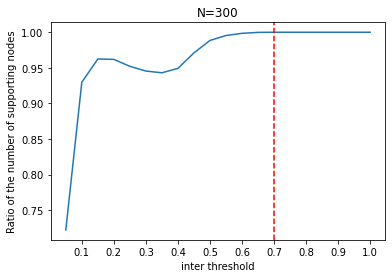

In [49]:
Xs = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0]

plt.plot(Xs, [i/300 for i in find_inter_thres_300_list])
plt.xticks([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
plt.axvline(x=0.7, color='r', linestyle='--')
plt.title('N=300')
plt.xlabel('inter threshold')
plt.ylabel('Ratio of the number of supporting nodes')
plt.savefig('find_inter_thres_300.png')

In [50]:
find_inter_thres_500_list = []

for col in find_inter_thres_500.columns:
    if col != 'rep':
        find_inter_thres_500_list.append(statistics.mean(find_inter_thres_500[col].values.tolist()))

print(find_inter_thres_500_list)

[413.29333333333335, 479.46, 483.4266666666667, 477.70666666666665, 472.5733333333333, 469.29333333333335, 469.82666666666665, 473.26666666666665, 485.8933333333333, 494.93333333333334, 497.52, 499.28666666666663, 499.87333333333333, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0]


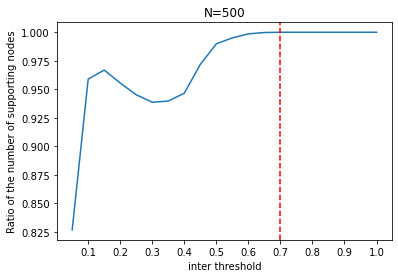

In [51]:
Xs = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0]

plt.plot(Xs, [i/500 for i in find_inter_thres_500_list])
plt.xticks([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
plt.axvline(x=0.7, color='r', linestyle='--')
plt.title('N=500')
plt.xlabel('inter threshold')
plt.ylabel('Ratio of the number of supporting nodes')
plt.savefig('find_inter_thres_500.png')

In [52]:
find_inter_thres_1000_list = []

for col in find_inter_thres_1000.columns:
    if col != 'rep':
        find_inter_thres_1000_list.append(statistics.mean(find_inter_thres_1000[col].values.tolist()))

print(find_inter_thres_1000_list)

[918.26, 971.42, 962.04, 947.64, 937.28, 934.5, 934.54, 947.56, 973.9, 990.74, 995.64, 998.28, 999.86, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0]


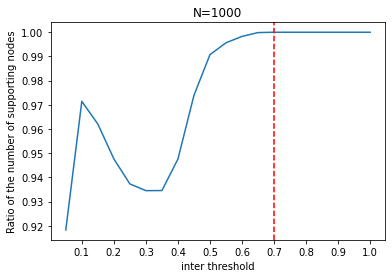

In [53]:
Xs = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0]

plt.plot(Xs, [i/1000 for i in find_inter_thres_1000_list])
plt.xticks([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
plt.axvline(x=0.7, color='r', linestyle='--')
plt.title('N=1000')
plt.xlabel('inter threshold')
plt.ylabel('Ratio of the number of supporting nodes')
plt.savefig('find_inter_thres_1000.png')

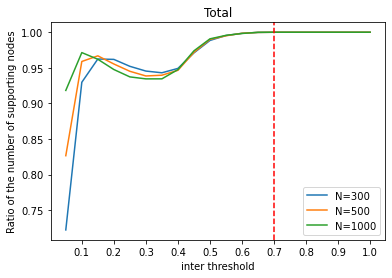

In [54]:
Xs = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0]

plt.plot(Xs, [i/300 for i in find_inter_thres_300_list])
plt.plot(Xs, [i/500 for i in find_inter_thres_500_list])
plt.plot(Xs, [i/1000 for i in find_inter_thres_1000_list])
plt.xticks([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
plt.title('Total')
plt.xlabel('inter threshold')
plt.ylabel('Ratio of the number of supporting nodes')
plt.legend(['N=300', 'N=500', 'N=1000'])
plt.axvline(x=0.7, color='r', linestyle='--')
plt.savefig('find_inter_thres_total.png')

## rep5_04_002

In [32]:
rgg_rgg_dict = {}
rgg_rand_dict = {}
rand_rgg_dict = {}
rand_rand_dict = {}

for i in range(20):
    target = [i*5 + 0, i*5 + 1, i*5 + 2, i*5 + 3, i*5 + 4]
    
    temp_rgg_rgg = rgg_rgg_data[i*5 + 0 : i*5 + 5]
    temp_rgg_rand = rgg_rand_data[i*5 + 0 : i*5 + 5]
    temp_rand_rgg = rand_rgg_data[i*5 + 0 : i*5 + 5]
    temp_rand_rand = rand_rand_data[i*5 + 0 : i*5 + 5]
    
    if i == 0:
        rgg_rgg_dict['intra_thres'] = [statistics.mean(temp_rgg_rgg['intra_thres'].values.tolist())]
        rgg_rgg_dict['alive_nodes'] = [statistics.mean(temp_rgg_rgg['alive_nodes'].values.tolist())]
        rgg_rgg_dict['init_mean_deg'] = [statistics.mean(temp_rgg_rgg['init_mean_deg'].values.tolist())]
        
        rgg_rand_dict['intra_thres'] = [statistics.mean(temp_rgg_rand['intra_thres'].values.tolist())]
        rgg_rand_dict['alive_nodes'] = [statistics.mean(temp_rgg_rand['alive_nodes'].values.tolist())]
        rgg_rand_dict['init_mean_deg'] = [statistics.mean(temp_rgg_rand['init_mean_deg'].values.tolist())]
        
        rand_rgg_dict['intra_thres'] = [statistics.mean(temp_rand_rgg['intra_thres'].values.tolist())]
        rand_rgg_dict['alive_nodes'] = [statistics.mean(temp_rand_rgg['alive_nodes'].values.tolist())]
        rand_rgg_dict['init_mean_deg'] = [statistics.mean(temp_rand_rgg['init_mean_deg'].values.tolist())]
        
        rand_rand_dict['intra_thres'] = [statistics.mean(temp_rand_rand['intra_thres'].values.tolist())]
        rand_rand_dict['alive_nodes'] = [statistics.mean(temp_rand_rand['alive_nodes'].values.tolist())]
        rand_rand_dict['init_mean_deg'] = [statistics.mean(temp_rand_rand['init_mean_deg'].values.tolist())]
    else:
        rgg_rgg_dict['intra_thres'].append(statistics.mean(temp_rgg_rgg['intra_thres'].values.tolist()))
        rgg_rgg_dict['alive_nodes'].append(statistics.mean(temp_rgg_rgg['alive_nodes'].values.tolist()))
        rgg_rgg_dict['init_mean_deg'].append(statistics.mean(temp_rgg_rgg['init_mean_deg'].values.tolist()))
        
        rgg_rand_dict['intra_thres'].append(statistics.mean(temp_rgg_rand['intra_thres'].values.tolist()))
        rgg_rand_dict['alive_nodes'].append(statistics.mean(temp_rgg_rand['alive_nodes'].values.tolist()))
        rgg_rand_dict['init_mean_deg'].append(statistics.mean(temp_rgg_rand['init_mean_deg'].values.tolist()))
        
        rand_rgg_dict['intra_thres'].append(statistics.mean(temp_rand_rgg['intra_thres'].values.tolist()))
        rand_rgg_dict['alive_nodes'].append(statistics.mean(temp_rand_rgg['alive_nodes'].values.tolist()))
        rand_rgg_dict['init_mean_deg'].append(statistics.mean(temp_rand_rgg['init_mean_deg'].values.tolist()))
        
        rand_rand_dict['intra_thres'].append(statistics.mean(temp_rand_rand['intra_thres'].values.tolist()))
        rand_rand_dict['alive_nodes'].append(statistics.mean(temp_rand_rand['alive_nodes'].values.tolist()))
        rand_rand_dict['init_mean_deg'].append(statistics.mean(temp_rand_rand['init_mean_deg'].values.tolist()))

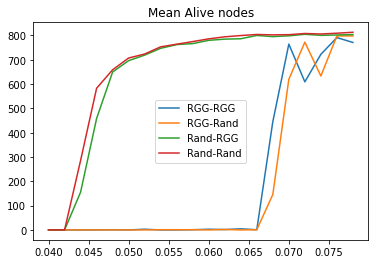

In [34]:
plt.plot(rgg_rgg_dict['intra_thres'], rgg_rgg_dict['alive_nodes'])
plt.plot(rgg_rgg_dict['intra_thres'], rgg_rand_dict['alive_nodes'])
plt.plot(rgg_rgg_dict['intra_thres'], rand_rgg_dict['alive_nodes'])
plt.plot(rgg_rgg_dict['intra_thres'], rand_rand_dict['alive_nodes'])
plt.legend(['RGG-RGG', 'RGG-Rand', 'Rand-RGG', 'Rand-Rand'])
plt.title('Mean Alive nodes')
plt.show()

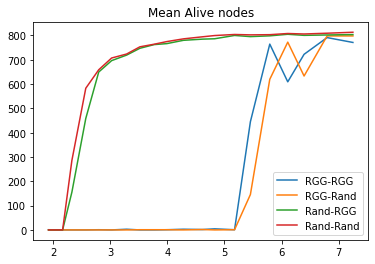

In [35]:
p = 0.9

plt.plot([p * i for i in rgg_rgg_dict['init_mean_deg']], rgg_rgg_dict['alive_nodes'])
plt.plot([p * i for i in rgg_rgg_dict['init_mean_deg']], rgg_rand_dict['alive_nodes'])
plt.plot([p * i for i in rgg_rgg_dict['init_mean_deg']], rand_rgg_dict['alive_nodes'])
plt.plot([p * i for i in rgg_rgg_dict['init_mean_deg']], rand_rand_dict['alive_nodes'])
plt.legend(['RGG-RGG', 'RGG-Rand', 'Rand-RGG', 'Rand-Rand'])
plt.title('Mean Alive nodes')
plt.show()

## att30_rep5_04_002

In [ ]:
rgg_rgg_2_dict = {}
rgg_rand_2_dict = {}
rand_rgg_2_dict = {}
rand_rand_2_dict = {}

for i in range(50):
    target = [i*5 + 0, i*5 + 1, i*5 + 2, i*5 + 3, i*5 + 4]
    
    temp_rgg_rgg = rgg_rgg_2_data[i*5 + 0 : i*5 + 5]
    temp_rgg_rand = rgg_rand_2_data[i*5 + 0 : i*5 + 5]
    temp_rand_rgg = rand_rgg_2_data[i*5 + 0 : i*5 + 5]
    temp_rand_rand = rand_rand_2_data[i*5 + 0 : i*5 + 5]
    
    if i == 0:
        rgg_rgg_2_dict['intra_thres'] = [statistics.mean(temp_rgg_rgg['intra_thres'].values.tolist())]
        rgg_rgg_2_dict['alive_nodes'] = [statistics.mean(temp_rgg_rgg['alive_nodes'].values.tolist())]
        rgg_rgg_2_dict['init_mean_deg'] = [statistics.mean(temp_rgg_rgg['init_mean_deg'].values.tolist())]
        
        rgg_rand_2_dict['intra_thres'] = [statistics.mean(temp_rgg_rand['intra_thres'].values.tolist())]
        rgg_rand_2_dict['alive_nodes'] = [statistics.mean(temp_rgg_rand['alive_nodes'].values.tolist())]
        rgg_rand_2_dict['init_mean_deg'] = [statistics.mean(temp_rgg_rand['init_mean_deg'].values.tolist())]
        
        rand_rgg_2_dict['intra_thres'] = [statistics.mean(temp_rand_rgg['intra_thres'].values.tolist())]
        rand_rgg_2_dict['alive_nodes'] = [statistics.mean(temp_rand_rgg['alive_nodes'].values.tolist())]
        rand_rgg_2_dict['init_mean_deg'] = [statistics.mean(temp_rand_rgg['init_mean_deg'].values.tolist())]
        
        rand_rand_2_dict['intra_thres'] = [statistics.mean(temp_rand_rand['intra_thres'].values.tolist())]
        rand_rand_2_dict['alive_nodes'] = [statistics.mean(temp_rand_rand['alive_nodes'].values.tolist())]
        rand_rand_2_dict['init_mean_deg'] = [statistics.mean(temp_rand_rand['init_mean_deg'].values.tolist())]
    else:
        rgg_rgg_2_dict['intra_thres'].append(statistics.mean(temp_rgg_rgg['intra_thres'].values.tolist()))
        rgg_rgg_2_dict['alive_nodes'].append(statistics.mean(temp_rgg_rgg['alive_nodes'].values.tolist()))
        rgg_rgg_2_dict['init_mean_deg'].append(statistics.mean(temp_rgg_rgg['init_mean_deg'].values.tolist()))
        
        rgg_rand_2_dict['intra_thres'].append(statistics.mean(temp_rgg_rand['intra_thres'].values.tolist()))
        rgg_rand_2_dict['alive_nodes'].append(statistics.mean(temp_rgg_rand['alive_nodes'].values.tolist()))
        rgg_rand_2_dict['init_mean_deg'].append(statistics.mean(temp_rgg_rand['init_mean_deg'].values.tolist()))
        
        rand_rgg_2_dict['intra_thres'].append(statistics.mean(temp_rand_rgg['intra_thres'].values.tolist()))
        rand_rgg_2_dict['alive_nodes'].append(statistics.mean(temp_rand_rgg['alive_nodes'].values.tolist()))
        rand_rgg_2_dict['init_mean_deg'].append(statistics.mean(temp_rand_rgg['init_mean_deg'].values.tolist()))
        
        rand_rand_2_dict['intra_thres'].append(statistics.mean(temp_rand_rand['intra_thres'].values.tolist()))
        rand_rand_2_dict['alive_nodes'].append(statistics.mean(temp_rand_rand['alive_nodes'].values.tolist()))
        rand_rand_2_dict['init_mean_deg'].append(statistics.mean(temp_rand_rand['init_mean_deg'].values.tolist()))

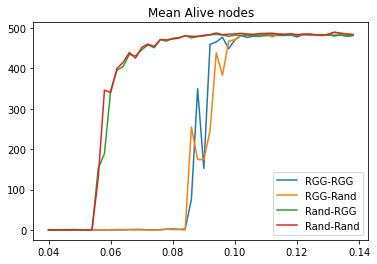

In [37]:
plt.plot(rgg_rgg_2_dict['intra_thres'], rgg_rgg_2_dict['alive_nodes'])
plt.plot(rgg_rgg_2_dict['intra_thres'], rgg_rand_2_dict['alive_nodes'])
plt.plot(rgg_rgg_2_dict['intra_thres'], rand_rgg_2_dict['alive_nodes'])
plt.plot(rgg_rgg_2_dict['intra_thres'], rand_rand_2_dict['alive_nodes'])
plt.legend(['RGG-RGG', 'RGG-Rand', 'Rand-RGG', 'Rand-Rand'])
plt.title('Mean Alive nodes')
plt.show()

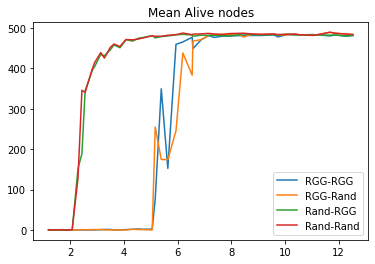

In [38]:
p = 0.9

plt.plot([p * i for i in rgg_rgg_2_dict['init_mean_deg']], rgg_rgg_2_dict['alive_nodes'])
plt.plot([p * i for i in rgg_rgg_2_dict['init_mean_deg']], rgg_rand_2_dict['alive_nodes'])
plt.plot([p * i for i in rgg_rgg_2_dict['init_mean_deg']], rand_rgg_2_dict['alive_nodes'])
plt.plot([p * i for i in rgg_rgg_2_dict['init_mean_deg']], rand_rand_2_dict['alive_nodes'])
plt.legend(['RGG-RGG', 'RGG-Rand', 'Rand-RGG', 'Rand-Rand'])
plt.title('Mean Alive nodes')
plt.show()

## buldy_RGG_rep30_03_0005

In [55]:
buldy_RGG_rep30_03_0005_rgg_rgg_dict = {}
buldy_RGG_rep30_03_0005_rgg_rand_dict = {}
buldy_RGG_rep30_03_0005_rand_rgg_dict = {}
buldy_RGG_rep30_03_0005_rand_rand_dict = {}

for i in range(100):
    target = list(range(i*30, (i+1)*30))
    
    temp_rgg_rgg = buldy_RGG_rep30_03_0005_rgg_rgg_data[i*30 : (i+1)*30]
    temp_rgg_rand = buldy_RGG_rep30_03_0005_rgg_rand_data[i*30 : (i+1)*30]
    temp_rand_rgg = buldy_RGG_rep30_03_0005_rand_rgg_data[i*30 : (i+1)*30]
    temp_rand_rand = buldy_RGG_rep30_03_0005_rand_rand_data[i*30 : (i+1)*30]
    
    rgg_rgg_alive = 0
    rgg_rand_alive = 0
    rand_rgg_alive = 0
    rand_rand_alive = 0
    for index in target:
        if (temp_rgg_rgg['alive_nodes'][index] != 0) and (temp_rgg_rgg['fin_larg_comp'][index] != 0):
            rgg_rgg_alive += 1
        if (temp_rgg_rand['alive_nodes'][index] != 0) and (temp_rgg_rand['fin_larg_comp'][index] != 0):
            rgg_rand_alive += 1
        if (temp_rand_rgg['alive_nodes'][index] != 0) and (temp_rand_rgg['fin_larg_comp'][index] != 0):
            rand_rgg_alive += 1
        if (temp_rand_rand['alive_nodes'][index] != 0) and (temp_rand_rand['fin_larg_comp'][index] != 0):
            rand_rand_alive += 1
    
    if i == 0:
        buldy_RGG_rep30_03_0005_rgg_rgg_dict['intra_thres'] = [statistics.mean(temp_rgg_rgg['intra_thres'].values.tolist())]
        buldy_RGG_rep30_03_0005_rgg_rgg_dict['alive_nodes'] = [statistics.mean(temp_rgg_rgg['alive_nodes'].values.tolist())]
        buldy_RGG_rep30_03_0005_rgg_rgg_dict['init_mean_deg'] = [statistics.mean(temp_rgg_rgg['init_mean_deg'].values.tolist())]
        buldy_RGG_rep30_03_0005_rgg_rgg_dict['alive ratio'] = [rgg_rgg_alive / 30]
        
        buldy_RGG_rep30_03_0005_rgg_rand_dict['intra_thres'] = [statistics.mean(temp_rgg_rand['intra_thres'].values.tolist())]
        buldy_RGG_rep30_03_0005_rgg_rand_dict['alive_nodes'] = [statistics.mean(temp_rgg_rand['alive_nodes'].values.tolist())]
        buldy_RGG_rep30_03_0005_rgg_rand_dict['init_mean_deg'] = [statistics.mean(temp_rgg_rand['init_mean_deg'].values.tolist())]
        buldy_RGG_rep30_03_0005_rgg_rand_dict['alive ratio'] = [rgg_rand_alive / 30]
        
        buldy_RGG_rep30_03_0005_rand_rgg_dict['intra_thres'] = [statistics.mean(temp_rand_rgg['intra_thres'].values.tolist())]
        buldy_RGG_rep30_03_0005_rand_rgg_dict['alive_nodes'] = [statistics.mean(temp_rand_rgg['alive_nodes'].values.tolist())]
        buldy_RGG_rep30_03_0005_rand_rgg_dict['init_mean_deg'] = [statistics.mean(temp_rand_rgg['init_mean_deg'].values.tolist())]
        buldy_RGG_rep30_03_0005_rand_rgg_dict['alive ratio'] = [rand_rgg_alive / 30]
        
        buldy_RGG_rep30_03_0005_rand_rand_dict['intra_thres'] = [statistics.mean(temp_rand_rand['intra_thres'].values.tolist())]
        buldy_RGG_rep30_03_0005_rand_rand_dict['alive_nodes'] = [statistics.mean(temp_rand_rand['alive_nodes'].values.tolist())]
        buldy_RGG_rep30_03_0005_rand_rand_dict['init_mean_deg'] = [statistics.mean(temp_rand_rand['init_mean_deg'].values.tolist())]
        buldy_RGG_rep30_03_0005_rand_rand_dict['alive ratio'] = [rand_rand_alive / 30]
    else:
        buldy_RGG_rep30_03_0005_rgg_rgg_dict['intra_thres'].append(statistics.mean(temp_rgg_rgg['intra_thres'].values.tolist()))
        buldy_RGG_rep30_03_0005_rgg_rgg_dict['alive_nodes'].append(statistics.mean(temp_rgg_rgg['alive_nodes'].values.tolist()))
        buldy_RGG_rep30_03_0005_rgg_rgg_dict['init_mean_deg'].append(statistics.mean(temp_rgg_rgg['init_mean_deg'].values.tolist()))
        buldy_RGG_rep30_03_0005_rgg_rgg_dict['alive ratio'].append(rgg_rgg_alive / 30)
        
        buldy_RGG_rep30_03_0005_rgg_rand_dict['intra_thres'].append(statistics.mean(temp_rgg_rand['intra_thres'].values.tolist()))
        buldy_RGG_rep30_03_0005_rgg_rand_dict['alive_nodes'].append(statistics.mean(temp_rgg_rand['alive_nodes'].values.tolist()))
        buldy_RGG_rep30_03_0005_rgg_rand_dict['init_mean_deg'].append(statistics.mean(temp_rgg_rand['init_mean_deg'].values.tolist()))
        buldy_RGG_rep30_03_0005_rgg_rand_dict['alive ratio'].append(rgg_rand_alive / 30)
        
        buldy_RGG_rep30_03_0005_rand_rgg_dict['intra_thres'].append(statistics.mean(temp_rand_rgg['intra_thres'].values.tolist()))
        buldy_RGG_rep30_03_0005_rand_rgg_dict['alive_nodes'].append(statistics.mean(temp_rand_rgg['alive_nodes'].values.tolist()))
        buldy_RGG_rep30_03_0005_rand_rgg_dict['init_mean_deg'].append(statistics.mean(temp_rand_rgg['init_mean_deg'].values.tolist()))
        buldy_RGG_rep30_03_0005_rand_rgg_dict['alive ratio'].append(rand_rgg_alive / 30)
        
        buldy_RGG_rep30_03_0005_rand_rand_dict['intra_thres'].append(statistics.mean(temp_rand_rand['intra_thres'].values.tolist()))
        buldy_RGG_rep30_03_0005_rand_rand_dict['alive_nodes'].append(statistics.mean(temp_rand_rand['alive_nodes'].values.tolist()))
        buldy_RGG_rep30_03_0005_rand_rand_dict['init_mean_deg'].append(statistics.mean(temp_rand_rand['init_mean_deg'].values.tolist()))
        buldy_RGG_rep30_03_0005_rand_rand_dict['alive ratio'].append(rand_rand_alive / 30)

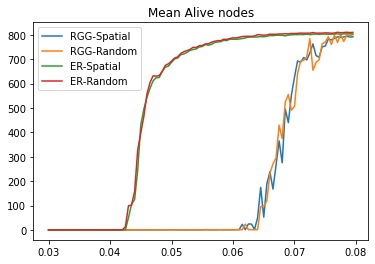

In [57]:
plt.plot(buldy_RGG_rep30_03_0005_rgg_rgg_dict['intra_thres'], buldy_RGG_rep30_03_0005_rgg_rgg_dict['alive_nodes'])
plt.plot(buldy_RGG_rep30_03_0005_rgg_rgg_dict['intra_thres'], buldy_RGG_rep30_03_0005_rgg_rand_dict['alive_nodes'])
plt.plot(buldy_RGG_rep30_03_0005_rgg_rgg_dict['intra_thres'], buldy_RGG_rep30_03_0005_rand_rgg_dict['alive_nodes'])
plt.plot(buldy_RGG_rep30_03_0005_rgg_rgg_dict['intra_thres'], buldy_RGG_rep30_03_0005_rand_rand_dict['alive_nodes'])
plt.legend(['RGG-Spatial', 'RGG-Random', 'ER-Spatial', 'ER-Random'])
plt.title('Mean Alive nodes')
plt.show()

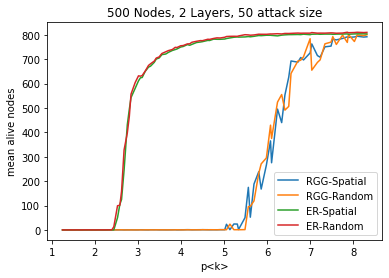

In [58]:
p = 0.9

plt.plot([p * i for i in buldy_RGG_rep30_03_0005_rgg_rgg_dict['init_mean_deg']], buldy_RGG_rep30_03_0005_rgg_rgg_dict['alive_nodes'])
plt.plot([p * i for i in buldy_RGG_rep30_03_0005_rgg_rgg_dict['init_mean_deg']], buldy_RGG_rep30_03_0005_rgg_rand_dict['alive_nodes'])
plt.plot([p * i for i in buldy_RGG_rep30_03_0005_rgg_rgg_dict['init_mean_deg']], buldy_RGG_rep30_03_0005_rand_rgg_dict['alive_nodes'])
plt.plot([p * i for i in buldy_RGG_rep30_03_0005_rgg_rgg_dict['init_mean_deg']], buldy_RGG_rep30_03_0005_rand_rand_dict['alive_nodes'])
plt.legend(['RGG-Spatial', 'RGG-Random', 'ER-Spatial', 'ER-Random'])
plt.title('500 Nodes, 2 Layers, 50 attack size')
plt.xlabel('p<k>')
plt.ylabel('mean alive nodes')
plt.savefig('buldy_RGG_rep30_03_0005.png')
plt.show()

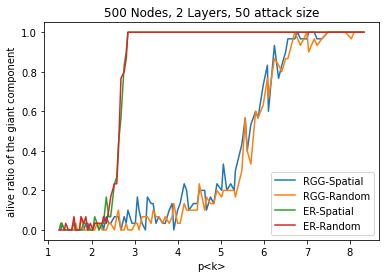

In [111]:
p = 0.9

plt.plot([p * i for i in buldy_RGG_rep30_03_0005_rgg_rgg_dict['init_mean_deg']], buldy_RGG_rep30_03_0005_rgg_rgg_dict['alive ratio'])
plt.plot([p * i for i in buldy_RGG_rep30_03_0005_rgg_rgg_dict['init_mean_deg']], buldy_RGG_rep30_03_0005_rgg_rand_dict['alive ratio'])
plt.plot([p * i for i in buldy_RGG_rep30_03_0005_rgg_rgg_dict['init_mean_deg']], buldy_RGG_rep30_03_0005_rand_rgg_dict['alive ratio'])
plt.plot([p * i for i in buldy_RGG_rep30_03_0005_rgg_rgg_dict['init_mean_deg']], buldy_RGG_rep30_03_0005_rand_rand_dict['alive ratio'])
plt.legend(['RGG-Spatial', 'RGG-Random', 'ER-Spatial', 'ER-Random'])
plt.title('500 Nodes, 2 Layers, 50 attack size')
plt.xlabel('p<k>')
plt.ylabel('alive ratio of the giant component')
plt.savefig('buldy_RGG_50_rep30_03_0005_ratio.png')
plt.show()

In [60]:
stats.ks_2samp(buldy_RGG_rep30_03_0005_rand_rgg_dict['alive ratio'], buldy_RGG_rep30_03_0005_rand_rand_dict['alive ratio'])

KstestResult(statistic=0.02, pvalue=0.9999999999999999)

In [61]:
stats.mannwhitneyu(buldy_RGG_rep30_03_0005_rand_rgg_dict['alive ratio'], buldy_RGG_rep30_03_0005_rand_rand_dict['alive ratio'])

MannwhitneyuResult(statistic=4967.5, pvalue=0.46230797652155564)

In [62]:
stats.ks_2samp(buldy_RGG_rep30_03_0005_rgg_rgg_dict['alive ratio'], buldy_RGG_rep30_03_0005_rgg_rand_dict['alive ratio'])

KstestResult(statistic=0.08, pvalue=0.9084105017744525)

In [63]:
stats.mannwhitneyu(buldy_RGG_rep30_03_0005_rgg_rgg_dict['alive ratio'], buldy_RGG_rep30_03_0005_rgg_rand_dict['alive ratio'])

MannwhitneyuResult(statistic=4679.5, pvalue=0.2151748088694564)

## buldy_RGG_100_rep30_03_0005

In [64]:
buldy_RGG_100_rep30_03_0005_rgg_rgg_dict = {}
buldy_RGG_100_rep30_03_0005_rgg_rand_dict = {}
buldy_RGG_100_rep30_03_0005_rand_rgg_dict = {}
buldy_RGG_100_rep30_03_0005_rand_rand_dict = {}

for i in range(100):
    target = list(range(i*30, (i+1)*30))
    
    temp_rgg_rgg = buldy_RGG_100_rep30_03_0005_rgg_rgg_data[i*30 : (i+1)*30]
    temp_rgg_rand = buldy_RGG_100_rep30_03_0005_rgg_rand_data[i*30 : (i+1)*30]
    temp_rand_rgg = buldy_RGG_100_rep30_03_0005_rand_rgg_data[i*30 : (i+1)*30]
    temp_rand_rand = buldy_RGG_100_rep30_03_0005_rand_rand_data[i*30 : (i+1)*30]
    
    rgg_rgg_alive = 0
    rgg_rand_alive = 0
    rand_rgg_alive = 0
    rand_rand_alive = 0
    for index in target:
        if (temp_rgg_rgg['alive_nodes'][index] != 0) and (temp_rgg_rgg['fin_larg_comp'][index] != 0):
            rgg_rgg_alive += 1
        if (temp_rgg_rand['alive_nodes'][index] != 0) and (temp_rgg_rand['fin_larg_comp'][index] != 0):
            rgg_rand_alive += 1
        if (temp_rand_rgg['alive_nodes'][index] != 0) and (temp_rand_rgg['fin_larg_comp'][index] != 0):
            rand_rgg_alive += 1
        if (temp_rand_rand['alive_nodes'][index] != 0) and (temp_rand_rand['fin_larg_comp'][index] != 0):
            rand_rand_alive += 1
    
    if i == 0:
        buldy_RGG_100_rep30_03_0005_rgg_rgg_dict['intra_thres'] = [statistics.mean(temp_rgg_rgg['intra_thres'].values.tolist())]
        buldy_RGG_100_rep30_03_0005_rgg_rgg_dict['alive_nodes'] = [statistics.mean(temp_rgg_rgg['alive_nodes'].values.tolist())]
        buldy_RGG_100_rep30_03_0005_rgg_rgg_dict['init_mean_deg'] = [statistics.mean(temp_rgg_rgg['init_mean_deg'].values.tolist())]
        buldy_RGG_100_rep30_03_0005_rgg_rgg_dict['alive ratio'] = [rgg_rgg_alive / 30]
        
        buldy_RGG_100_rep30_03_0005_rgg_rand_dict['intra_thres'] = [statistics.mean(temp_rgg_rand['intra_thres'].values.tolist())]
        buldy_RGG_100_rep30_03_0005_rgg_rand_dict['alive_nodes'] = [statistics.mean(temp_rgg_rand['alive_nodes'].values.tolist())]
        buldy_RGG_100_rep30_03_0005_rgg_rand_dict['init_mean_deg'] = [statistics.mean(temp_rgg_rand['init_mean_deg'].values.tolist())]
        buldy_RGG_100_rep30_03_0005_rgg_rand_dict['alive ratio'] = [rgg_rand_alive / 30]
        
        buldy_RGG_100_rep30_03_0005_rand_rgg_dict['intra_thres'] = [statistics.mean(temp_rand_rgg['intra_thres'].values.tolist())]
        buldy_RGG_100_rep30_03_0005_rand_rgg_dict['alive_nodes'] = [statistics.mean(temp_rand_rgg['alive_nodes'].values.tolist())]
        buldy_RGG_100_rep30_03_0005_rand_rgg_dict['init_mean_deg'] = [statistics.mean(temp_rand_rgg['init_mean_deg'].values.tolist())]
        buldy_RGG_100_rep30_03_0005_rand_rgg_dict['alive ratio'] = [rand_rgg_alive / 30]
        
        buldy_RGG_100_rep30_03_0005_rand_rand_dict['intra_thres'] = [statistics.mean(temp_rand_rand['intra_thres'].values.tolist())]
        buldy_RGG_100_rep30_03_0005_rand_rand_dict['alive_nodes'] = [statistics.mean(temp_rand_rand['alive_nodes'].values.tolist())]
        buldy_RGG_100_rep30_03_0005_rand_rand_dict['init_mean_deg'] = [statistics.mean(temp_rand_rand['init_mean_deg'].values.tolist())]
        buldy_RGG_100_rep30_03_0005_rand_rand_dict['alive ratio'] = [rand_rand_alive / 30]
    else:
        buldy_RGG_100_rep30_03_0005_rgg_rgg_dict['intra_thres'].append(statistics.mean(temp_rgg_rgg['intra_thres'].values.tolist()))
        buldy_RGG_100_rep30_03_0005_rgg_rgg_dict['alive_nodes'].append(statistics.mean(temp_rgg_rgg['alive_nodes'].values.tolist()))
        buldy_RGG_100_rep30_03_0005_rgg_rgg_dict['init_mean_deg'].append(statistics.mean(temp_rgg_rgg['init_mean_deg'].values.tolist()))
        buldy_RGG_100_rep30_03_0005_rgg_rgg_dict['alive ratio'].append(rgg_rgg_alive / 30)
        
        buldy_RGG_100_rep30_03_0005_rgg_rand_dict['intra_thres'].append(statistics.mean(temp_rgg_rand['intra_thres'].values.tolist()))
        buldy_RGG_100_rep30_03_0005_rgg_rand_dict['alive_nodes'].append(statistics.mean(temp_rgg_rand['alive_nodes'].values.tolist()))
        buldy_RGG_100_rep30_03_0005_rgg_rand_dict['init_mean_deg'].append(statistics.mean(temp_rgg_rand['init_mean_deg'].values.tolist()))
        buldy_RGG_100_rep30_03_0005_rgg_rand_dict['alive ratio'].append(rgg_rand_alive / 30)
        
        buldy_RGG_100_rep30_03_0005_rand_rgg_dict['intra_thres'].append(statistics.mean(temp_rand_rgg['intra_thres'].values.tolist()))
        buldy_RGG_100_rep30_03_0005_rand_rgg_dict['alive_nodes'].append(statistics.mean(temp_rand_rgg['alive_nodes'].values.tolist()))
        buldy_RGG_100_rep30_03_0005_rand_rgg_dict['init_mean_deg'].append(statistics.mean(temp_rand_rgg['init_mean_deg'].values.tolist()))
        buldy_RGG_100_rep30_03_0005_rand_rgg_dict['alive ratio'].append(rand_rgg_alive / 30)
        
        buldy_RGG_100_rep30_03_0005_rand_rand_dict['intra_thres'].append(statistics.mean(temp_rand_rand['intra_thres'].values.tolist()))
        buldy_RGG_100_rep30_03_0005_rand_rand_dict['alive_nodes'].append(statistics.mean(temp_rand_rand['alive_nodes'].values.tolist()))
        buldy_RGG_100_rep30_03_0005_rand_rand_dict['init_mean_deg'].append(statistics.mean(temp_rand_rand['init_mean_deg'].values.tolist()))
        buldy_RGG_100_rep30_03_0005_rand_rand_dict['alive ratio'].append(rand_rand_alive / 30)

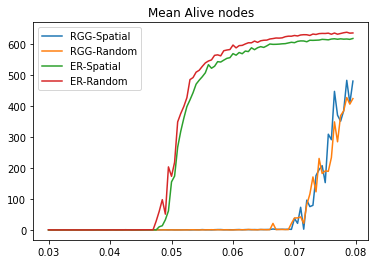

In [65]:
plt.plot(buldy_RGG_100_rep30_03_0005_rgg_rgg_dict['intra_thres'], buldy_RGG_100_rep30_03_0005_rgg_rgg_dict['alive_nodes'])
plt.plot(buldy_RGG_100_rep30_03_0005_rgg_rgg_dict['intra_thres'], buldy_RGG_100_rep30_03_0005_rgg_rand_dict['alive_nodes'])
plt.plot(buldy_RGG_100_rep30_03_0005_rgg_rgg_dict['intra_thres'], buldy_RGG_100_rep30_03_0005_rand_rgg_dict['alive_nodes'])
plt.plot(buldy_RGG_100_rep30_03_0005_rgg_rgg_dict['intra_thres'], buldy_RGG_100_rep30_03_0005_rand_rand_dict['alive_nodes'])
plt.legend(['RGG-Spatial', 'RGG-Random', 'ER-Spatial', 'ER-Random'])
plt.title('Mean Alive nodes')
plt.show()

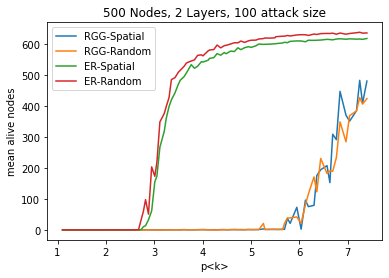

In [66]:
p = 0.8

plt.plot([p * i for i in buldy_RGG_100_rep30_03_0005_rgg_rgg_dict['init_mean_deg']], buldy_RGG_100_rep30_03_0005_rgg_rgg_dict['alive_nodes'])
plt.plot([p * i for i in buldy_RGG_100_rep30_03_0005_rgg_rgg_dict['init_mean_deg']], buldy_RGG_100_rep30_03_0005_rgg_rand_dict['alive_nodes'])
plt.plot([p * i for i in buldy_RGG_100_rep30_03_0005_rgg_rgg_dict['init_mean_deg']], buldy_RGG_100_rep30_03_0005_rand_rgg_dict['alive_nodes'])
plt.plot([p * i for i in buldy_RGG_100_rep30_03_0005_rgg_rgg_dict['init_mean_deg']], buldy_RGG_100_rep30_03_0005_rand_rand_dict['alive_nodes'])
plt.legend(['RGG-Spatial', 'RGG-Random', 'ER-Spatial', 'ER-Random'])
plt.title('500 Nodes, 2 Layers, 100 attack size')
plt.xlabel('p<k>')
plt.ylabel('mean alive nodes')
plt.savefig('buldy_RGG_100_rep30_03_0005.png')
plt.show()

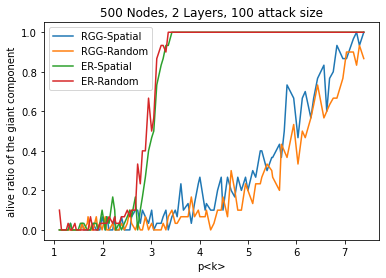

In [68]:
p = 0.8

plt.plot([p * i for i in buldy_RGG_100_rep30_03_0005_rgg_rgg_dict['init_mean_deg']], buldy_RGG_100_rep30_03_0005_rgg_rgg_dict['alive ratio'])
plt.plot([p * i for i in buldy_RGG_100_rep30_03_0005_rgg_rgg_dict['init_mean_deg']], buldy_RGG_100_rep30_03_0005_rgg_rand_dict['alive ratio'])
plt.plot([p * i for i in buldy_RGG_100_rep30_03_0005_rgg_rgg_dict['init_mean_deg']], buldy_RGG_100_rep30_03_0005_rand_rgg_dict['alive ratio'])
plt.plot([p * i for i in buldy_RGG_100_rep30_03_0005_rgg_rgg_dict['init_mean_deg']], buldy_RGG_100_rep30_03_0005_rand_rand_dict['alive ratio'])
plt.legend(['RGG-Spatial', 'RGG-Random', 'ER-Spatial', 'ER-Random'])
plt.title('500 Nodes, 2 Layers, 100 attack size')
plt.xlabel('p<k>')
plt.ylabel('alive ratio of the giant component')
plt.savefig('buldy_RGG_100_rep30_03_0005_ratio.png')
plt.show()

In [69]:
stats.ks_2samp(buldy_RGG_100_rep30_03_0005_rand_rgg_dict['alive ratio'], buldy_RGG_100_rep30_03_0005_rand_rand_dict['alive ratio'])

KstestResult(statistic=0.03, pvalue=0.9999999999962054)

In [70]:
stats.mannwhitneyu(buldy_RGG_100_rep30_03_0005_rand_rgg_dict['alive ratio'], buldy_RGG_100_rep30_03_0005_rand_rand_dict['alive ratio'])

MannwhitneyuResult(statistic=4908.0, pvalue=0.40369381591689607)

In [71]:
stats.ks_2samp(buldy_RGG_100_rep30_03_0005_rgg_rgg_dict['alive ratio'], buldy_RGG_100_rep30_03_0005_rgg_rand_dict['alive ratio'])

KstestResult(statistic=0.12, pvalue=0.469506448503778)

In [72]:
stats.mannwhitneyu(buldy_RGG_100_rep30_03_0005_rgg_rgg_dict['alive ratio'], buldy_RGG_100_rep30_03_0005_rgg_rand_dict['alive ratio'])

MannwhitneyuResult(statistic=4459.0, pvalue=0.08993513626679522)

## buldy_RGG_200_rep30_03_0005

In [73]:
buldy_RGG_200_rep30_03_0005_rgg_rgg_dict = {}
buldy_RGG_200_rep30_03_0005_rgg_rand_dict = {}
buldy_RGG_200_rep30_03_0005_rand_rgg_dict = {}
buldy_RGG_200_rep30_03_0005_rand_rand_dict = {}

for i in range(100):
    target = list(range(i*30, (i+1)*30))
    
    temp_rgg_rgg = buldy_RGG_200_rep30_03_0005_rgg_rgg_data[i*30 : (i+1)*30]
    temp_rgg_rand = buldy_RGG_200_rep30_03_0005_rgg_rand_data[i*30 : (i+1)*30]
    temp_rand_rgg = buldy_RGG_200_rep30_03_0005_rand_rgg_data[i*30 : (i+1)*30]
    temp_rand_rand = buldy_RGG_200_rep30_03_0005_rand_rand_data[i*30 : (i+1)*30]
    
    rgg_rgg_alive = 0
    rgg_rand_alive = 0
    rand_rgg_alive = 0
    rand_rand_alive = 0
    for index in target:
        if (temp_rgg_rgg['alive_nodes'][index] != 0) and (temp_rgg_rgg['fin_larg_comp'][index] != 0):
            rgg_rgg_alive += 1
        if (temp_rgg_rand['alive_nodes'][index] != 0) and (temp_rgg_rand['fin_larg_comp'][index] != 0):
            rgg_rand_alive += 1
        if (temp_rand_rgg['alive_nodes'][index] != 0) and (temp_rand_rgg['fin_larg_comp'][index] != 0):
            rand_rgg_alive += 1
        if (temp_rand_rand['alive_nodes'][index] != 0) and (temp_rand_rand['fin_larg_comp'][index] != 0):
            rand_rand_alive += 1
    
    if i == 0:
        buldy_RGG_200_rep30_03_0005_rgg_rgg_dict['intra_thres'] = [statistics.mean(temp_rgg_rgg['intra_thres'].values.tolist())]
        buldy_RGG_200_rep30_03_0005_rgg_rgg_dict['alive_nodes'] = [statistics.mean(temp_rgg_rgg['alive_nodes'].values.tolist())]
        buldy_RGG_200_rep30_03_0005_rgg_rgg_dict['init_mean_deg'] = [statistics.mean(temp_rgg_rgg['init_mean_deg'].values.tolist())]
        buldy_RGG_200_rep30_03_0005_rgg_rgg_dict['alive ratio'] = [rgg_rgg_alive / 30]
        
        buldy_RGG_200_rep30_03_0005_rgg_rand_dict['intra_thres'] = [statistics.mean(temp_rgg_rand['intra_thres'].values.tolist())]
        buldy_RGG_200_rep30_03_0005_rgg_rand_dict['alive_nodes'] = [statistics.mean(temp_rgg_rand['alive_nodes'].values.tolist())]
        buldy_RGG_200_rep30_03_0005_rgg_rand_dict['init_mean_deg'] = [statistics.mean(temp_rgg_rand['init_mean_deg'].values.tolist())]
        buldy_RGG_200_rep30_03_0005_rgg_rand_dict['alive ratio'] = [rgg_rand_alive / 30]
        
        buldy_RGG_200_rep30_03_0005_rand_rgg_dict['intra_thres'] = [statistics.mean(temp_rand_rgg['intra_thres'].values.tolist())]
        buldy_RGG_200_rep30_03_0005_rand_rgg_dict['alive_nodes'] = [statistics.mean(temp_rand_rgg['alive_nodes'].values.tolist())]
        buldy_RGG_200_rep30_03_0005_rand_rgg_dict['init_mean_deg'] = [statistics.mean(temp_rand_rgg['init_mean_deg'].values.tolist())]
        buldy_RGG_200_rep30_03_0005_rand_rgg_dict['alive ratio'] = [rand_rgg_alive / 30]
        
        buldy_RGG_200_rep30_03_0005_rand_rand_dict['intra_thres'] = [statistics.mean(temp_rand_rand['intra_thres'].values.tolist())]
        buldy_RGG_200_rep30_03_0005_rand_rand_dict['alive_nodes'] = [statistics.mean(temp_rand_rand['alive_nodes'].values.tolist())]
        buldy_RGG_200_rep30_03_0005_rand_rand_dict['init_mean_deg'] = [statistics.mean(temp_rand_rand['init_mean_deg'].values.tolist())]
        buldy_RGG_200_rep30_03_0005_rand_rand_dict['alive ratio'] = [rand_rand_alive / 30]
    else:
        buldy_RGG_200_rep30_03_0005_rgg_rgg_dict['intra_thres'].append(statistics.mean(temp_rgg_rgg['intra_thres'].values.tolist()))
        buldy_RGG_200_rep30_03_0005_rgg_rgg_dict['alive_nodes'].append(statistics.mean(temp_rgg_rgg['alive_nodes'].values.tolist()))
        buldy_RGG_200_rep30_03_0005_rgg_rgg_dict['init_mean_deg'].append(statistics.mean(temp_rgg_rgg['init_mean_deg'].values.tolist()))
        buldy_RGG_200_rep30_03_0005_rgg_rgg_dict['alive ratio'].append(rgg_rgg_alive / 30)
        
        buldy_RGG_200_rep30_03_0005_rgg_rand_dict['intra_thres'].append(statistics.mean(temp_rgg_rand['intra_thres'].values.tolist()))
        buldy_RGG_200_rep30_03_0005_rgg_rand_dict['alive_nodes'].append(statistics.mean(temp_rgg_rand['alive_nodes'].values.tolist()))
        buldy_RGG_200_rep30_03_0005_rgg_rand_dict['init_mean_deg'].append(statistics.mean(temp_rgg_rand['init_mean_deg'].values.tolist()))
        buldy_RGG_200_rep30_03_0005_rgg_rand_dict['alive ratio'].append(rgg_rand_alive / 30)
        
        buldy_RGG_200_rep30_03_0005_rand_rgg_dict['intra_thres'].append(statistics.mean(temp_rand_rgg['intra_thres'].values.tolist()))
        buldy_RGG_200_rep30_03_0005_rand_rgg_dict['alive_nodes'].append(statistics.mean(temp_rand_rgg['alive_nodes'].values.tolist()))
        buldy_RGG_200_rep30_03_0005_rand_rgg_dict['init_mean_deg'].append(statistics.mean(temp_rand_rgg['init_mean_deg'].values.tolist()))
        buldy_RGG_200_rep30_03_0005_rand_rgg_dict['alive ratio'].append(rand_rgg_alive / 30)
        
        buldy_RGG_200_rep30_03_0005_rand_rand_dict['intra_thres'].append(statistics.mean(temp_rand_rand['intra_thres'].values.tolist()))
        buldy_RGG_200_rep30_03_0005_rand_rand_dict['alive_nodes'].append(statistics.mean(temp_rand_rand['alive_nodes'].values.tolist()))
        buldy_RGG_200_rep30_03_0005_rand_rand_dict['init_mean_deg'].append(statistics.mean(temp_rand_rand['init_mean_deg'].values.tolist()))
        buldy_RGG_200_rep30_03_0005_rand_rand_dict['alive ratio'].append(rand_rand_alive / 30)

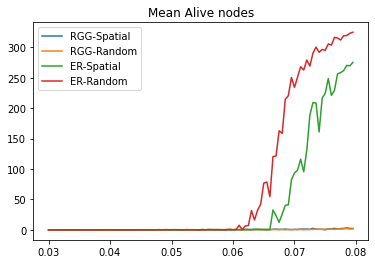

In [74]:
plt.plot(buldy_RGG_200_rep30_03_0005_rgg_rgg_dict['intra_thres'], buldy_RGG_200_rep30_03_0005_rgg_rgg_dict['alive_nodes'])
plt.plot(buldy_RGG_200_rep30_03_0005_rgg_rgg_dict['intra_thres'], buldy_RGG_200_rep30_03_0005_rgg_rand_dict['alive_nodes'])
plt.plot(buldy_RGG_200_rep30_03_0005_rgg_rgg_dict['intra_thres'], buldy_RGG_200_rep30_03_0005_rand_rgg_dict['alive_nodes'])
plt.plot(buldy_RGG_200_rep30_03_0005_rgg_rgg_dict['intra_thres'], buldy_RGG_200_rep30_03_0005_rand_rand_dict['alive_nodes'])
plt.legend(['RGG-Spatial', 'RGG-Random', 'ER-Spatial', 'ER-Random'])
plt.title('Mean Alive nodes')
plt.show()

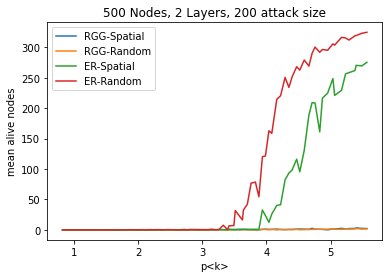

In [75]:
p = 0.6

plt.plot([p * i for i in buldy_RGG_200_rep30_03_0005_rgg_rgg_dict['init_mean_deg']], buldy_RGG_200_rep30_03_0005_rgg_rgg_dict['alive_nodes'])
plt.plot([p * i for i in buldy_RGG_200_rep30_03_0005_rgg_rgg_dict['init_mean_deg']], buldy_RGG_200_rep30_03_0005_rgg_rand_dict['alive_nodes'])
plt.plot([p * i for i in buldy_RGG_200_rep30_03_0005_rgg_rgg_dict['init_mean_deg']], buldy_RGG_200_rep30_03_0005_rand_rgg_dict['alive_nodes'])
plt.plot([p * i for i in buldy_RGG_200_rep30_03_0005_rgg_rgg_dict['init_mean_deg']], buldy_RGG_200_rep30_03_0005_rand_rand_dict['alive_nodes'])
plt.legend(['RGG-Spatial', 'RGG-Random', 'ER-Spatial', 'ER-Random'])
plt.title('500 Nodes, 2 Layers, 200 attack size')
plt.xlabel('p<k>')
plt.ylabel('mean alive nodes')
plt.savefig('buldy_RGG_200_rep30_03_0005.png')
plt.show()

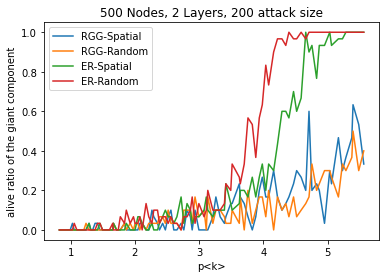

In [76]:
p = 0.6

plt.plot([p * i for i in buldy_RGG_200_rep30_03_0005_rgg_rgg_dict['init_mean_deg']], buldy_RGG_200_rep30_03_0005_rgg_rgg_dict['alive ratio'])
plt.plot([p * i for i in buldy_RGG_200_rep30_03_0005_rgg_rgg_dict['init_mean_deg']], buldy_RGG_200_rep30_03_0005_rgg_rand_dict['alive ratio'])
plt.plot([p * i for i in buldy_RGG_200_rep30_03_0005_rgg_rgg_dict['init_mean_deg']], buldy_RGG_200_rep30_03_0005_rand_rgg_dict['alive ratio'])
plt.plot([p * i for i in buldy_RGG_200_rep30_03_0005_rgg_rgg_dict['init_mean_deg']], buldy_RGG_200_rep30_03_0005_rand_rand_dict['alive ratio'])
plt.legend(['RGG-Spatial', 'RGG-Random', 'ER-Spatial', 'ER-Random'])
plt.title('500 Nodes, 2 Layers, 200 attack size')
plt.xlabel('p<k>')
plt.ylabel('alive ratio of the giant component')
plt.savefig('buldy_RGG_200_rep30_03_0005_ratio.png')
plt.show()

## buldy_RGG_200_rep30_035_0006

In [78]:
buldy_RGG_200_rep30_035_0006_rgg_rgg_dict = {}
buldy_RGG_200_rep30_035_0006_rgg_rand_dict = {}
buldy_RGG_200_rep30_035_0006_rand_rgg_dict = {}
buldy_RGG_200_rep30_035_0006_rand_rand_dict = {}

for i in range(100):
    target = list(range(i*30, (i+1)*30))
    
    temp_rgg_rgg = buldy_RGG_200_rep30_035_0006_rgg_rgg_data[i*30 : (i+1)*30]
    temp_rgg_rand = buldy_RGG_200_rep30_035_0006_rgg_rand_data[i*30 : (i+1)*30]
    temp_rand_rgg = buldy_RGG_200_rep30_035_0006_rand_rgg_data[i*30 : (i+1)*30]
    temp_rand_rand = buldy_RGG_200_rep30_035_0006_rand_rand_data[i*30 : (i+1)*30]
    
    rgg_rgg_alive = 0
    rgg_rand_alive = 0
    rand_rgg_alive = 0
    rand_rand_alive = 0
    for index in target:
        if (temp_rgg_rgg['alive_nodes'][index] != 0) and (temp_rgg_rgg['fin_larg_comp'][index] != 0):
            rgg_rgg_alive += 1
        if (temp_rgg_rand['alive_nodes'][index] != 0) and (temp_rgg_rand['fin_larg_comp'][index] != 0):
            rgg_rand_alive += 1
        if (temp_rand_rgg['alive_nodes'][index] != 0) and (temp_rand_rgg['fin_larg_comp'][index] != 0):
            rand_rgg_alive += 1
        if (temp_rand_rand['alive_nodes'][index] != 0) and (temp_rand_rand['fin_larg_comp'][index] != 0):
            rand_rand_alive += 1
    
    if i == 0:
        buldy_RGG_200_rep30_035_0006_rgg_rgg_dict['intra_thres'] = [statistics.mean(temp_rgg_rgg['intra_thres'].values.tolist())]
        buldy_RGG_200_rep30_035_0006_rgg_rgg_dict['alive_nodes'] = [statistics.mean(temp_rgg_rgg['alive_nodes'].values.tolist())]
        buldy_RGG_200_rep30_035_0006_rgg_rgg_dict['init_mean_deg'] = [statistics.mean(temp_rgg_rgg['init_mean_deg'].values.tolist())]
        buldy_RGG_200_rep30_035_0006_rgg_rgg_dict['alive ratio'] = [rgg_rgg_alive / 30]
        
        buldy_RGG_200_rep30_035_0006_rgg_rand_dict['intra_thres'] = [statistics.mean(temp_rgg_rand['intra_thres'].values.tolist())]
        buldy_RGG_200_rep30_035_0006_rgg_rand_dict['alive_nodes'] = [statistics.mean(temp_rgg_rand['alive_nodes'].values.tolist())]
        buldy_RGG_200_rep30_035_0006_rgg_rand_dict['init_mean_deg'] = [statistics.mean(temp_rgg_rand['init_mean_deg'].values.tolist())]
        buldy_RGG_200_rep30_035_0006_rgg_rand_dict['alive ratio'] = [rgg_rand_alive / 30]
        
        buldy_RGG_200_rep30_035_0006_rand_rgg_dict['intra_thres'] = [statistics.mean(temp_rand_rgg['intra_thres'].values.tolist())]
        buldy_RGG_200_rep30_035_0006_rand_rgg_dict['alive_nodes'] = [statistics.mean(temp_rand_rgg['alive_nodes'].values.tolist())]
        buldy_RGG_200_rep30_035_0006_rand_rgg_dict['init_mean_deg'] = [statistics.mean(temp_rand_rgg['init_mean_deg'].values.tolist())]
        buldy_RGG_200_rep30_035_0006_rand_rgg_dict['alive ratio'] = [rand_rgg_alive / 30]
        
        buldy_RGG_200_rep30_035_0006_rand_rand_dict['intra_thres'] = [statistics.mean(temp_rand_rand['intra_thres'].values.tolist())]
        buldy_RGG_200_rep30_035_0006_rand_rand_dict['alive_nodes'] = [statistics.mean(temp_rand_rand['alive_nodes'].values.tolist())]
        buldy_RGG_200_rep30_035_0006_rand_rand_dict['init_mean_deg'] = [statistics.mean(temp_rand_rand['init_mean_deg'].values.tolist())]
        buldy_RGG_200_rep30_035_0006_rand_rand_dict['alive ratio'] = [rand_rand_alive / 30]
    else:
        buldy_RGG_200_rep30_035_0006_rgg_rgg_dict['intra_thres'].append(statistics.mean(temp_rgg_rgg['intra_thres'].values.tolist()))
        buldy_RGG_200_rep30_035_0006_rgg_rgg_dict['alive_nodes'].append(statistics.mean(temp_rgg_rgg['alive_nodes'].values.tolist()))
        buldy_RGG_200_rep30_035_0006_rgg_rgg_dict['init_mean_deg'].append(statistics.mean(temp_rgg_rgg['init_mean_deg'].values.tolist()))
        buldy_RGG_200_rep30_035_0006_rgg_rgg_dict['alive ratio'].append(rgg_rgg_alive / 30)
        
        buldy_RGG_200_rep30_035_0006_rgg_rand_dict['intra_thres'].append(statistics.mean(temp_rgg_rand['intra_thres'].values.tolist()))
        buldy_RGG_200_rep30_035_0006_rgg_rand_dict['alive_nodes'].append(statistics.mean(temp_rgg_rand['alive_nodes'].values.tolist()))
        buldy_RGG_200_rep30_035_0006_rgg_rand_dict['init_mean_deg'].append(statistics.mean(temp_rgg_rand['init_mean_deg'].values.tolist()))
        buldy_RGG_200_rep30_035_0006_rgg_rand_dict['alive ratio'].append(rgg_rand_alive / 30)
        
        buldy_RGG_200_rep30_035_0006_rand_rgg_dict['intra_thres'].append(statistics.mean(temp_rand_rgg['intra_thres'].values.tolist()))
        buldy_RGG_200_rep30_035_0006_rand_rgg_dict['alive_nodes'].append(statistics.mean(temp_rand_rgg['alive_nodes'].values.tolist()))
        buldy_RGG_200_rep30_035_0006_rand_rgg_dict['init_mean_deg'].append(statistics.mean(temp_rand_rgg['init_mean_deg'].values.tolist()))
        buldy_RGG_200_rep30_035_0006_rand_rgg_dict['alive ratio'].append(rand_rgg_alive / 30)
        
        buldy_RGG_200_rep30_035_0006_rand_rand_dict['intra_thres'].append(statistics.mean(temp_rand_rand['intra_thres'].values.tolist()))
        buldy_RGG_200_rep30_035_0006_rand_rand_dict['alive_nodes'].append(statistics.mean(temp_rand_rand['alive_nodes'].values.tolist()))
        buldy_RGG_200_rep30_035_0006_rand_rand_dict['init_mean_deg'].append(statistics.mean(temp_rand_rand['init_mean_deg'].values.tolist()))
        buldy_RGG_200_rep30_035_0006_rand_rand_dict['alive ratio'].append(rand_rand_alive / 30)

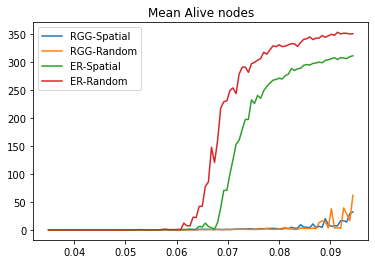

In [79]:
plt.plot(buldy_RGG_200_rep30_035_0006_rgg_rgg_dict['intra_thres'], buldy_RGG_200_rep30_035_0006_rgg_rgg_dict['alive_nodes'])
plt.plot(buldy_RGG_200_rep30_035_0006_rgg_rgg_dict['intra_thres'], buldy_RGG_200_rep30_035_0006_rgg_rand_dict['alive_nodes'])
plt.plot(buldy_RGG_200_rep30_035_0006_rgg_rgg_dict['intra_thres'], buldy_RGG_200_rep30_035_0006_rand_rgg_dict['alive_nodes'])
plt.plot(buldy_RGG_200_rep30_035_0006_rgg_rgg_dict['intra_thres'], buldy_RGG_200_rep30_035_0006_rand_rand_dict['alive_nodes'])
plt.legend(['RGG-Spatial', 'RGG-Random', 'ER-Spatial', 'ER-Random'])
plt.title('Mean Alive nodes')
plt.show()

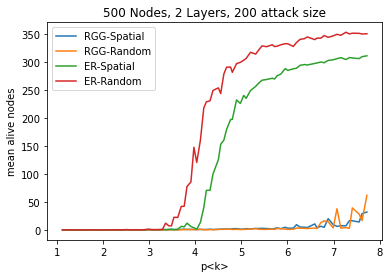

In [80]:
p = 0.6

plt.plot([p * i for i in buldy_RGG_200_rep30_035_0006_rgg_rgg_dict['init_mean_deg']], buldy_RGG_200_rep30_035_0006_rgg_rgg_dict['alive_nodes'])
plt.plot([p * i for i in buldy_RGG_200_rep30_035_0006_rgg_rgg_dict['init_mean_deg']], buldy_RGG_200_rep30_035_0006_rgg_rand_dict['alive_nodes'])
plt.plot([p * i for i in buldy_RGG_200_rep30_035_0006_rgg_rgg_dict['init_mean_deg']], buldy_RGG_200_rep30_035_0006_rand_rgg_dict['alive_nodes'])
plt.plot([p * i for i in buldy_RGG_200_rep30_035_0006_rgg_rgg_dict['init_mean_deg']], buldy_RGG_200_rep30_035_0006_rand_rand_dict['alive_nodes'])
plt.legend(['RGG-Spatial', 'RGG-Random', 'ER-Spatial', 'ER-Random'])
plt.title('500 Nodes, 2 Layers, 200 attack size')
plt.xlabel('p<k>')
plt.ylabel('mean alive nodes')
plt.savefig('buldy_RGG_200_rep30_035_0006.png')
plt.show()

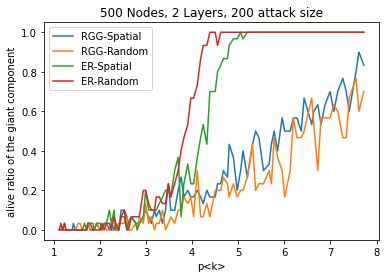

In [81]:
p = 0.6

plt.plot([p * i for i in buldy_RGG_200_rep30_035_0006_rgg_rgg_dict['init_mean_deg']], buldy_RGG_200_rep30_035_0006_rgg_rgg_dict['alive ratio'])
plt.plot([p * i for i in buldy_RGG_200_rep30_035_0006_rgg_rgg_dict['init_mean_deg']], buldy_RGG_200_rep30_035_0006_rgg_rand_dict['alive ratio'])
plt.plot([p * i for i in buldy_RGG_200_rep30_035_0006_rgg_rgg_dict['init_mean_deg']], buldy_RGG_200_rep30_035_0006_rand_rgg_dict['alive ratio'])
plt.plot([p * i for i in buldy_RGG_200_rep30_035_0006_rgg_rgg_dict['init_mean_deg']], buldy_RGG_200_rep30_035_0006_rand_rand_dict['alive ratio'])
plt.legend(['RGG-Spatial', 'RGG-Random', 'ER-Spatial', 'ER-Random'])
plt.title('500 Nodes, 2 Layers, 200 attack size')
plt.xlabel('p<k>')
plt.ylabel('alive ratio of the giant component')
plt.savefig('buldy_RGG_200_rep30_035_0006_ratio.png')
plt.show()

In [82]:
stats.ks_2samp(buldy_RGG_200_rep30_035_0006_rand_rgg_dict['alive ratio'], buldy_RGG_200_rep30_035_0006_rand_rand_dict['alive ratio'])

KstestResult(statistic=0.09, pvalue=0.8154147124661313)

In [83]:
stats.mannwhitneyu(buldy_RGG_200_rep30_035_0006_rand_rgg_dict['alive ratio'], buldy_RGG_200_rep30_035_0006_rand_rand_dict['alive ratio'])

MannwhitneyuResult(statistic=4739.5, pvalue=0.25668027674706845)

In [84]:
stats.ks_2samp(buldy_RGG_200_rep30_035_0006_rgg_rgg_dict['alive ratio'], buldy_RGG_200_rep30_035_0006_rgg_rand_dict['alive ratio'])

KstestResult(statistic=0.11, pvalue=0.5830090612540064)

In [85]:
stats.mannwhitneyu(buldy_RGG_200_rep30_035_0006_rgg_rgg_dict['alive ratio'], buldy_RGG_200_rep30_035_0006_rgg_rand_dict['alive ratio'])

MannwhitneyuResult(statistic=4346.5, pvalue=0.05361777414211406)

## buldy_RGG_30_rep30_04_0007

In [86]:
buldy_RGG_30_rep30_04_0007_rgg_rgg_dict = {}
buldy_RGG_30_rep30_04_0007_rgg_rand_dict = {}
buldy_RGG_30_rep30_04_0007_rand_rgg_dict = {}
buldy_RGG_30_rep30_04_0007_rand_rand_dict = {}

for i in range(100):
    target = list(range(i*30, (i+1)*30))
    
    temp_rgg_rgg = buldy_RGG_30_rep30_04_0007_rgg_rgg_data[i*30 : (i+1)*30]
    temp_rgg_rand = buldy_RGG_30_rep30_04_0007_rgg_rand_data[i*30 : (i+1)*30]
    temp_rand_rgg = buldy_RGG_30_rep30_04_0007_rand_rgg_data[i*30 : (i+1)*30]
    temp_rand_rand = buldy_RGG_30_rep30_04_0007_rand_rand_data[i*30 : (i+1)*30]
    
    rgg_rgg_alive = 0
    rgg_rand_alive = 0
    rand_rgg_alive = 0
    rand_rand_alive = 0
    for index in target:
        if (temp_rgg_rgg['alive_nodes'][index] != 0) and (temp_rgg_rgg['fin_larg_comp'][index] != 0):
            rgg_rgg_alive += 1
        if (temp_rgg_rand['alive_nodes'][index] != 0) and (temp_rgg_rand['fin_larg_comp'][index] != 0):
            rgg_rand_alive += 1
        if (temp_rand_rgg['alive_nodes'][index] != 0) and (temp_rand_rgg['fin_larg_comp'][index] != 0):
            rand_rgg_alive += 1
        if (temp_rand_rand['alive_nodes'][index] != 0) and (temp_rand_rand['fin_larg_comp'][index] != 0):
            rand_rand_alive += 1
    
    if i == 0:
        buldy_RGG_30_rep30_04_0007_rgg_rgg_dict['intra_thres'] = [statistics.mean(temp_rgg_rgg['intra_thres'].values.tolist())]
        buldy_RGG_30_rep30_04_0007_rgg_rgg_dict['alive_nodes'] = [statistics.mean(temp_rgg_rgg['alive_nodes'].values.tolist())]
        buldy_RGG_30_rep30_04_0007_rgg_rgg_dict['init_mean_deg'] = [statistics.mean(temp_rgg_rgg['init_mean_deg'].values.tolist())]
        buldy_RGG_30_rep30_04_0007_rgg_rgg_dict['alive ratio'] = [rgg_rgg_alive / 30]
        
        buldy_RGG_30_rep30_04_0007_rgg_rand_dict['intra_thres'] = [statistics.mean(temp_rgg_rand['intra_thres'].values.tolist())]
        buldy_RGG_30_rep30_04_0007_rgg_rand_dict['alive_nodes'] = [statistics.mean(temp_rgg_rand['alive_nodes'].values.tolist())]
        buldy_RGG_30_rep30_04_0007_rgg_rand_dict['init_mean_deg'] = [statistics.mean(temp_rgg_rand['init_mean_deg'].values.tolist())]
        buldy_RGG_30_rep30_04_0007_rgg_rand_dict['alive ratio'] = [rgg_rand_alive / 30]
        
        buldy_RGG_30_rep30_04_0007_rand_rgg_dict['intra_thres'] = [statistics.mean(temp_rand_rgg['intra_thres'].values.tolist())]
        buldy_RGG_30_rep30_04_0007_rand_rgg_dict['alive_nodes'] = [statistics.mean(temp_rand_rgg['alive_nodes'].values.tolist())]
        buldy_RGG_30_rep30_04_0007_rand_rgg_dict['init_mean_deg'] = [statistics.mean(temp_rand_rgg['init_mean_deg'].values.tolist())]
        buldy_RGG_30_rep30_04_0007_rand_rgg_dict['alive ratio'] = [rand_rgg_alive / 30]
        
        buldy_RGG_30_rep30_04_0007_rand_rand_dict['intra_thres'] = [statistics.mean(temp_rand_rand['intra_thres'].values.tolist())]
        buldy_RGG_30_rep30_04_0007_rand_rand_dict['alive_nodes'] = [statistics.mean(temp_rand_rand['alive_nodes'].values.tolist())]
        buldy_RGG_30_rep30_04_0007_rand_rand_dict['init_mean_deg'] = [statistics.mean(temp_rand_rand['init_mean_deg'].values.tolist())]
        buldy_RGG_30_rep30_04_0007_rand_rand_dict['alive ratio'] = [rand_rand_alive / 30]
    else:
        buldy_RGG_30_rep30_04_0007_rgg_rgg_dict['intra_thres'].append(statistics.mean(temp_rgg_rgg['intra_thres'].values.tolist()))
        buldy_RGG_30_rep30_04_0007_rgg_rgg_dict['alive_nodes'].append(statistics.mean(temp_rgg_rgg['alive_nodes'].values.tolist()))
        buldy_RGG_30_rep30_04_0007_rgg_rgg_dict['init_mean_deg'].append(statistics.mean(temp_rgg_rgg['init_mean_deg'].values.tolist()))
        buldy_RGG_30_rep30_04_0007_rgg_rgg_dict['alive ratio'].append(rgg_rgg_alive / 30)
        
        buldy_RGG_30_rep30_04_0007_rgg_rand_dict['intra_thres'].append(statistics.mean(temp_rgg_rand['intra_thres'].values.tolist()))
        buldy_RGG_30_rep30_04_0007_rgg_rand_dict['alive_nodes'].append(statistics.mean(temp_rgg_rand['alive_nodes'].values.tolist()))
        buldy_RGG_30_rep30_04_0007_rgg_rand_dict['init_mean_deg'].append(statistics.mean(temp_rgg_rand['init_mean_deg'].values.tolist()))
        buldy_RGG_30_rep30_04_0007_rgg_rand_dict['alive ratio'].append(rgg_rand_alive / 30)
        
        buldy_RGG_30_rep30_04_0007_rand_rgg_dict['intra_thres'].append(statistics.mean(temp_rand_rgg['intra_thres'].values.tolist()))
        buldy_RGG_30_rep30_04_0007_rand_rgg_dict['alive_nodes'].append(statistics.mean(temp_rand_rgg['alive_nodes'].values.tolist()))
        buldy_RGG_30_rep30_04_0007_rand_rgg_dict['init_mean_deg'].append(statistics.mean(temp_rand_rgg['init_mean_deg'].values.tolist()))
        buldy_RGG_30_rep30_04_0007_rand_rgg_dict['alive ratio'].append(rand_rgg_alive / 30)
        
        buldy_RGG_30_rep30_04_0007_rand_rand_dict['intra_thres'].append(statistics.mean(temp_rand_rand['intra_thres'].values.tolist()))
        buldy_RGG_30_rep30_04_0007_rand_rand_dict['alive_nodes'].append(statistics.mean(temp_rand_rand['alive_nodes'].values.tolist()))
        buldy_RGG_30_rep30_04_0007_rand_rand_dict['init_mean_deg'].append(statistics.mean(temp_rand_rand['init_mean_deg'].values.tolist()))
        buldy_RGG_30_rep30_04_0007_rand_rand_dict['alive ratio'].append(rand_rand_alive / 30)

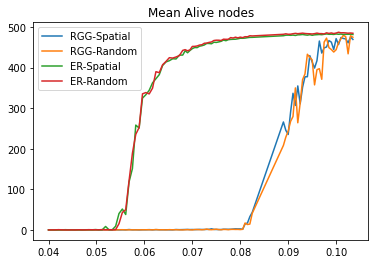

In [87]:
plt.plot(buldy_RGG_30_rep30_04_0007_rgg_rgg_dict['intra_thres'], buldy_RGG_30_rep30_04_0007_rgg_rgg_dict['alive_nodes'])
plt.plot(buldy_RGG_30_rep30_04_0007_rgg_rgg_dict['intra_thres'], buldy_RGG_30_rep30_04_0007_rgg_rand_dict['alive_nodes'])
plt.plot(buldy_RGG_30_rep30_04_0007_rgg_rgg_dict['intra_thres'], buldy_RGG_30_rep30_04_0007_rand_rgg_dict['alive_nodes'])
plt.plot(buldy_RGG_30_rep30_04_0007_rgg_rgg_dict['intra_thres'], buldy_RGG_30_rep30_04_0007_rand_rand_dict['alive_nodes'])
plt.legend(['RGG-Spatial', 'RGG-Random', 'ER-Spatial', 'ER-Random'])
plt.title('Mean Alive nodes')
plt.show()

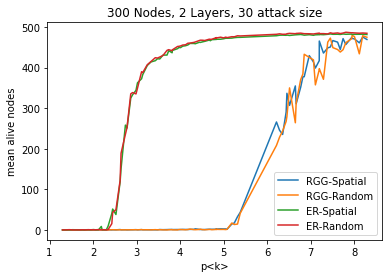

In [88]:
p = 0.9

plt.plot([p * i for i in buldy_RGG_30_rep30_04_0007_rgg_rgg_dict['init_mean_deg']], buldy_RGG_30_rep30_04_0007_rgg_rgg_dict['alive_nodes'])
plt.plot([p * i for i in buldy_RGG_30_rep30_04_0007_rgg_rgg_dict['init_mean_deg']], buldy_RGG_30_rep30_04_0007_rgg_rand_dict['alive_nodes'])
plt.plot([p * i for i in buldy_RGG_30_rep30_04_0007_rgg_rgg_dict['init_mean_deg']], buldy_RGG_30_rep30_04_0007_rand_rgg_dict['alive_nodes'])
plt.plot([p * i for i in buldy_RGG_30_rep30_04_0007_rgg_rgg_dict['init_mean_deg']], buldy_RGG_30_rep30_04_0007_rand_rand_dict['alive_nodes'])
plt.title('300 Nodes, 2 Layers, 30 attack size')
plt.xlabel('p<k>')
plt.ylabel('mean alive nodes')
plt.legend(['RGG-Spatial', 'RGG-Random', 'ER-Spatial', 'ER-Random'])
plt.savefig('buldy_RGG_30_rep30_04_0007')
plt.show()

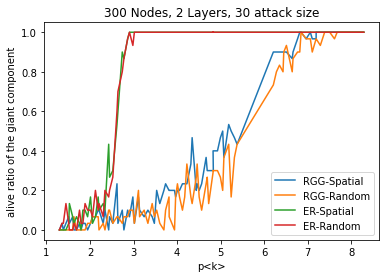

In [89]:
p = 0.9

plt.plot([p * i for i in buldy_RGG_30_rep30_04_0007_rgg_rgg_dict['init_mean_deg']], buldy_RGG_30_rep30_04_0007_rgg_rgg_dict['alive ratio'])
plt.plot([p * i for i in buldy_RGG_30_rep30_04_0007_rgg_rgg_dict['init_mean_deg']], buldy_RGG_30_rep30_04_0007_rgg_rand_dict['alive ratio'])
plt.plot([p * i for i in buldy_RGG_30_rep30_04_0007_rgg_rgg_dict['init_mean_deg']], buldy_RGG_30_rep30_04_0007_rand_rgg_dict['alive ratio'])
plt.plot([p * i for i in buldy_RGG_30_rep30_04_0007_rgg_rgg_dict['init_mean_deg']], buldy_RGG_30_rep30_04_0007_rand_rand_dict['alive ratio'])
plt.legend(['RGG-Spatial', 'RGG-Random', 'ER-Spatial', 'ER-Random'])
plt.title('300 Nodes, 2 Layers, 30 attack size')
plt.xlabel('p<k>')
plt.ylabel('alive ratio of the giant component')
plt.savefig('buldy_RGG_30_rep30_04_0007_ratio')
plt.show()

In [90]:
stats.ks_2samp(buldy_RGG_30_rep30_04_0007_rand_rgg_dict['alive ratio'], buldy_RGG_30_rep30_04_0007_rand_rand_dict['alive ratio'])

KstestResult(statistic=0.02, pvalue=0.9999999999999999)

In [91]:
stats.mannwhitneyu(buldy_RGG_30_rep30_04_0007_rand_rgg_dict['alive ratio'], buldy_RGG_30_rep30_04_0007_rand_rand_dict['alive ratio'])

MannwhitneyuResult(statistic=4968.0, pvalue=0.46195150714898825)

In [92]:
stats.ks_2samp(buldy_RGG_30_rep30_04_0007_rgg_rgg_dict['alive ratio'], buldy_RGG_30_rep30_04_0007_rgg_rand_dict['alive ratio'])

KstestResult(statistic=0.15, pvalue=0.21117008625127576)

In [93]:
stats.mannwhitneyu(buldy_RGG_30_rep30_04_0007_rgg_rgg_dict['alive ratio'], buldy_RGG_30_rep30_04_0007_rgg_rand_dict['alive ratio'])

MannwhitneyuResult(statistic=4438.5, pvalue=0.08431724636324611)

## buldy_RGG_1000_rep30_02_0005

In [94]:
buldy_RGG_1000_rep30_02_0005_rgg_rgg_dict = {}
buldy_RGG_1000_rep30_02_0005_rgg_rand_dict = {}
buldy_RGG_1000_rep30_02_0005_rand_rgg_dict = {}
buldy_RGG_1000_rep30_02_0005_rand_rand_dict = {}

for i in range(80):
    target = list(range(i*30, (i+1)*30))
    
    temp_rgg_rgg = buldy_RGG_1000_rep30_02_0005_rgg_rgg_data[i*30 : (i+1)*30]
    temp_rgg_rand = buldy_RGG_1000_rep30_02_0005_rgg_rand_data[i*30 : (i+1)*30]
    temp_rand_rgg = buldy_RGG_1000_rep30_02_0005_rand_rgg_data[i*30 : (i+1)*30]
    temp_rand_rand = buldy_RGG_1000_rep30_02_0005_rand_rand_data[i*30 : (i+1)*30]
    
    rgg_rgg_alive = 0
    rgg_rand_alive = 0
    rand_rgg_alive = 0
    rand_rand_alive = 0
    for index in target:
        if (temp_rgg_rgg['alive_nodes'][index] != 0) and (temp_rgg_rgg['fin_larg_comp'][index] != 0):
            rgg_rgg_alive += 1
        if (temp_rgg_rand['alive_nodes'][index] != 0) and (temp_rgg_rand['fin_larg_comp'][index] != 0):
            rgg_rand_alive += 1
        if (temp_rand_rgg['alive_nodes'][index] != 0) and (temp_rand_rgg['fin_larg_comp'][index] != 0):
            rand_rgg_alive += 1
        if (temp_rand_rand['alive_nodes'][index] != 0) and (temp_rand_rand['fin_larg_comp'][index] != 0):
            rand_rand_alive += 1
    
    if i == 0:
        buldy_RGG_1000_rep30_02_0005_rgg_rgg_dict['intra_thres'] = [statistics.mean(temp_rgg_rgg['intra_thres'].values.tolist())]
        buldy_RGG_1000_rep30_02_0005_rgg_rgg_dict['alive_nodes'] = [statistics.mean(temp_rgg_rgg['alive_nodes'].values.tolist())]
        buldy_RGG_1000_rep30_02_0005_rgg_rgg_dict['init_mean_deg'] = [statistics.mean(temp_rgg_rgg['init_mean_deg'].values.tolist())]
        buldy_RGG_1000_rep30_02_0005_rgg_rgg_dict['alive ratio'] = [rgg_rgg_alive / 30]
        
        buldy_RGG_1000_rep30_02_0005_rgg_rand_dict['intra_thres'] = [statistics.mean(temp_rgg_rand['intra_thres'].values.tolist())]
        buldy_RGG_1000_rep30_02_0005_rgg_rand_dict['alive_nodes'] = [statistics.mean(temp_rgg_rand['alive_nodes'].values.tolist())]
        buldy_RGG_1000_rep30_02_0005_rgg_rand_dict['init_mean_deg'] = [statistics.mean(temp_rgg_rand['init_mean_deg'].values.tolist())]
        buldy_RGG_1000_rep30_02_0005_rgg_rand_dict['alive ratio'] = [rgg_rand_alive / 30]
        
        buldy_RGG_1000_rep30_02_0005_rand_rgg_dict['intra_thres'] = [statistics.mean(temp_rand_rgg['intra_thres'].values.tolist())]
        buldy_RGG_1000_rep30_02_0005_rand_rgg_dict['alive_nodes'] = [statistics.mean(temp_rand_rgg['alive_nodes'].values.tolist())]
        buldy_RGG_1000_rep30_02_0005_rand_rgg_dict['init_mean_deg'] = [statistics.mean(temp_rand_rgg['init_mean_deg'].values.tolist())]
        buldy_RGG_1000_rep30_02_0005_rand_rgg_dict['alive ratio'] = [rand_rgg_alive / 30]
        
        buldy_RGG_1000_rep30_02_0005_rand_rand_dict['intra_thres'] = [statistics.mean(temp_rand_rand['intra_thres'].values.tolist())]
        buldy_RGG_1000_rep30_02_0005_rand_rand_dict['alive_nodes'] = [statistics.mean(temp_rand_rand['alive_nodes'].values.tolist())]
        buldy_RGG_1000_rep30_02_0005_rand_rand_dict['init_mean_deg'] = [statistics.mean(temp_rand_rand['init_mean_deg'].values.tolist())]
        buldy_RGG_1000_rep30_02_0005_rand_rand_dict['alive ratio'] = [rand_rand_alive / 30]
    else:
        buldy_RGG_1000_rep30_02_0005_rgg_rgg_dict['intra_thres'].append(statistics.mean(temp_rgg_rgg['intra_thres'].values.tolist()))
        buldy_RGG_1000_rep30_02_0005_rgg_rgg_dict['alive_nodes'].append(statistics.mean(temp_rgg_rgg['alive_nodes'].values.tolist()))
        buldy_RGG_1000_rep30_02_0005_rgg_rgg_dict['init_mean_deg'].append(statistics.mean(temp_rgg_rgg['init_mean_deg'].values.tolist()))
        buldy_RGG_1000_rep30_02_0005_rgg_rgg_dict['alive ratio'].append(rgg_rgg_alive / 30)
        
        buldy_RGG_1000_rep30_02_0005_rgg_rand_dict['intra_thres'].append(statistics.mean(temp_rgg_rand['intra_thres'].values.tolist()))
        buldy_RGG_1000_rep30_02_0005_rgg_rand_dict['alive_nodes'].append(statistics.mean(temp_rgg_rand['alive_nodes'].values.tolist()))
        buldy_RGG_1000_rep30_02_0005_rgg_rand_dict['init_mean_deg'].append(statistics.mean(temp_rgg_rand['init_mean_deg'].values.tolist()))
        buldy_RGG_1000_rep30_02_0005_rgg_rand_dict['alive ratio'].append(rgg_rand_alive / 30)
        
        buldy_RGG_1000_rep30_02_0005_rand_rgg_dict['intra_thres'].append(statistics.mean(temp_rand_rgg['intra_thres'].values.tolist()))
        buldy_RGG_1000_rep30_02_0005_rand_rgg_dict['alive_nodes'].append(statistics.mean(temp_rand_rgg['alive_nodes'].values.tolist()))
        buldy_RGG_1000_rep30_02_0005_rand_rgg_dict['init_mean_deg'].append(statistics.mean(temp_rand_rgg['init_mean_deg'].values.tolist()))
        buldy_RGG_1000_rep30_02_0005_rand_rgg_dict['alive ratio'].append(rand_rgg_alive / 30)
        
        buldy_RGG_1000_rep30_02_0005_rand_rand_dict['intra_thres'].append(statistics.mean(temp_rand_rand['intra_thres'].values.tolist()))
        buldy_RGG_1000_rep30_02_0005_rand_rand_dict['alive_nodes'].append(statistics.mean(temp_rand_rand['alive_nodes'].values.tolist()))
        buldy_RGG_1000_rep30_02_0005_rand_rand_dict['init_mean_deg'].append(statistics.mean(temp_rand_rand['init_mean_deg'].values.tolist()))
        buldy_RGG_1000_rep30_02_0005_rand_rand_dict['alive ratio'].append(rand_rand_alive / 30)

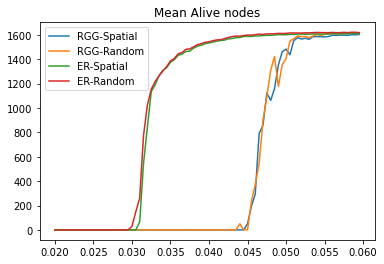

In [95]:
plt.plot(buldy_RGG_1000_rep30_02_0005_rgg_rgg_dict['intra_thres'], buldy_RGG_1000_rep30_02_0005_rgg_rgg_dict['alive_nodes'])
plt.plot(buldy_RGG_1000_rep30_02_0005_rgg_rgg_dict['intra_thres'], buldy_RGG_1000_rep30_02_0005_rgg_rand_dict['alive_nodes'])
plt.plot(buldy_RGG_1000_rep30_02_0005_rgg_rgg_dict['intra_thres'], buldy_RGG_1000_rep30_02_0005_rand_rgg_dict['alive_nodes'])
plt.plot(buldy_RGG_1000_rep30_02_0005_rgg_rgg_dict['intra_thres'], buldy_RGG_1000_rep30_02_0005_rand_rand_dict['alive_nodes'])
plt.legend(['RGG-Spatial', 'RGG-Random', 'ER-Spatial', 'ER-Random'])
plt.title('Mean Alive nodes')
plt.show()

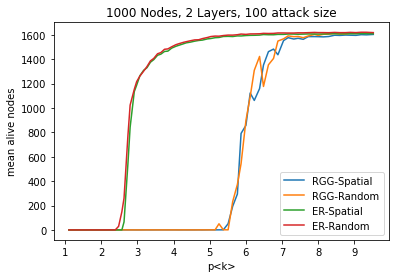

In [96]:
p = 0.9

plt.plot([p * i for i in buldy_RGG_1000_rep30_02_0005_rgg_rgg_dict['init_mean_deg']], buldy_RGG_1000_rep30_02_0005_rgg_rgg_dict['alive_nodes'])
plt.plot([p * i for i in buldy_RGG_1000_rep30_02_0005_rgg_rgg_dict['init_mean_deg']], buldy_RGG_1000_rep30_02_0005_rgg_rand_dict['alive_nodes'])
plt.plot([p * i for i in buldy_RGG_1000_rep30_02_0005_rgg_rgg_dict['init_mean_deg']], buldy_RGG_1000_rep30_02_0005_rand_rgg_dict['alive_nodes'])
plt.plot([p * i for i in buldy_RGG_1000_rep30_02_0005_rgg_rgg_dict['init_mean_deg']], buldy_RGG_1000_rep30_02_0005_rand_rand_dict['alive_nodes'])
plt.title('1000 Nodes, 2 Layers, 100 attack size')
plt.xlabel('p<k>')
plt.ylabel('mean alive nodes')
plt.legend(['RGG-Spatial', 'RGG-Random', 'ER-Spatial', 'ER-Random'])
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9])
plt.savefig('buldy_RGG_1000_rep30_02_0005.png')
plt.show()

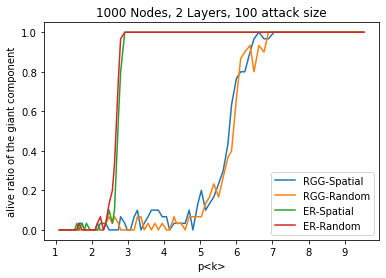

In [97]:
p = 0.9

plt.plot([p * i for i in buldy_RGG_1000_rep30_02_0005_rgg_rgg_dict['init_mean_deg']], buldy_RGG_1000_rep30_02_0005_rgg_rgg_dict['alive ratio'])
plt.plot([p * i for i in buldy_RGG_1000_rep30_02_0005_rgg_rgg_dict['init_mean_deg']], buldy_RGG_1000_rep30_02_0005_rgg_rand_dict['alive ratio'])
plt.plot([p * i for i in buldy_RGG_1000_rep30_02_0005_rgg_rgg_dict['init_mean_deg']], buldy_RGG_1000_rep30_02_0005_rand_rgg_dict['alive ratio'])
plt.plot([p * i for i in buldy_RGG_1000_rep30_02_0005_rgg_rgg_dict['init_mean_deg']], buldy_RGG_1000_rep30_02_0005_rand_rand_dict['alive ratio'])
plt.legend(['RGG-Spatial', 'RGG-Random', 'ER-Spatial', 'ER-Random'])
plt.title('1000 Nodes, 2 Layers, 100 attack size')
plt.xlabel('p<k>')
plt.ylabel('alive ratio of the giant component')
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9])
plt.savefig('buldy_RGG_1000_rep30_02_0005_ratio.png')
plt.show()

## buldy_RGG_50_rep100_045

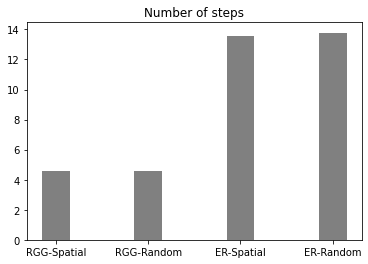

In [98]:
step_nums = []
step_nums.append(statistics.mean(buldy_RGG_50_rep100_045_rgg_rgg_data['cas_steps'].values.tolist()))
step_nums.append(statistics.mean(buldy_RGG_50_rep100_045_rgg_rand_data['cas_steps'].values.tolist()))
step_nums.append(statistics.mean(buldy_RGG_50_rep100_045_rand_rgg_data['cas_steps'].values.tolist()))
step_nums.append(statistics.mean(buldy_RGG_50_rep100_045_rand_rand_data['cas_steps'].values.tolist()))

index = np.arange(4)
graph_types = ['RGG-Spatial', 'RGG-Random', 'ER-Spatial', 'ER-Random']

plt.bar(index, step_nums, width=0.3, color='gray')
plt.xticks(index, graph_types)
plt.title('Number of steps')
plt.savefig('The number of steps.png')
plt.show()

In [99]:
buldy_RGG_50_rep100_045_far_dead_node = {}
cum_far_dead_node = {'rgg_rgg': [],
                     'rgg_rand': [],
                     'rand_rgg': [],
                     'rand_rand': []}

for index in range(len(buldy_RGG_50_rep100_045_rgg_rgg_data.columns) - 21):
    for j in range(100):
        if buldy_RGG_50_rep100_045_rgg_rgg_data['step%d_far_dead_node' % index][j] != 0:
            
        
    if i == 0:
        buldy_RGG_50_rep100_045_far_dead_node['rgg_rgg'] = [statistics.mean(buldy_RGG_50_rep100_045_rgg_rgg_data['step%d_far_dead_node' % index].values.tolist())]
        buldy_RGG_50_rep100_045_far_dead_node['rgg_rand'] = [statistics.mean(buldy_RGG_50_rep100_045_rgg_rand_data['step%d_far_dead_node' % index].values.tolist())]
        buldy_RGG_50_rep100_045_far_dead_node['rand_rgg'] = [statistics.mean(buldy_RGG_50_rep100_045_rand_rgg_data['step%d_far_dead_node' % index].values.tolist())]
        buldy_RGG_50_rep100_045_far_dead_node['rand_rand'] = [statistics.mean(buldy_RGG_50_rep100_045_rand_rand_data['step%d_far_dead_node' % index].values.tolist())]
    else:
        buldy_RGG_50_rep100_045_far_dead_node['rgg_rgg'].append(statistics.mean(buldy_RGG_50_rep100_045_rgg_rgg_data['step%d_far_dead_node' % index].values.tolist()))
        buldy_RGG_50_rep100_045_far_dead_node['rgg_rand'].append(statistics.mean(buldy_RGG_50_rep100_045_rgg_rand_data['step%d_far_dead_node' % index].values.tolist()))
        buldy_RGG_50_rep100_045_far_dead_node['rand_rgg'].append(statistics.mean(buldy_RGG_50_rep100_045_rand_rgg_data['step%d_far_dead_node' % index].values.tolist()))
        buldy_RGG_50_rep100_045_far_dead_node['rand_rand'].append(statistics.mean(buldy_RGG_50_rep100_045_rand_rand_data['step%d_far_dead_node' % index].values.tolist()))
        

IndentationError: expected an indented block (<ipython-input-99-26aa7f3d0fc3>, line 12)

In [66]:
cum_far_dead_node = {'rgg_rgg': [],
                     'rgg_rand': [],
                     'rand_rgg': [],
                     'rand_rand': []}

for index, row in buldy_RGG_50_rep100_045_rgg_rgg_data.iterrows():
    cur_row = row.tolist()
    
    length = int((len(buldy_RGG_50_rep100_045_rgg_rgg_data.columns) - 21) / 3)
    
    temp = []
    for i in range(length):
        if cur_row[(3*i) + 23] != 0:
            temp.append(cur_row[(3*i) + 23])
        else:
            temp.append(temp[i-2])
            
    cum_far_dead_node['rgg_rgg'].append(temp)
            
print(cum_far_dead_node['rgg_rgg'])

[[0.6879706789051951, 0.5505739703384914, 0.5338971958657229, 0.5139744869480464, 0.5338971958657229, 0.5139744869480464, 0.5338971958657229, 0.5139744869480464, 0.5338971958657229, 0.5139744869480464, 0.5338971958657229, 0.5139744869480464, 0.5338971958657229, 0.5139744869480464, 0.5338971958657229, 0.5139744869480464, 0.5338971958657229, 0.5139744869480464, 0.5338971958657229], [0.6960127715310351, 0.5837410892936934, 0.51608809631184, 0.4675166249630603, 0.4470879808901324, 0.4675166249630603, 0.4470879808901324, 0.4675166249630603, 0.4470879808901324, 0.4675166249630603, 0.4470879808901324, 0.4675166249630603, 0.4470879808901324, 0.4675166249630603, 0.4470879808901324, 0.4675166249630603, 0.4470879808901324, 0.4675166249630603, 0.4470879808901324], [0.6888664840477402, 0.5460979608018127, 0.4992577185176286, 0.4754801286633672, 0.4875410130890059, 0.4754801286633672, 0.4875410130890059, 0.4754801286633672, 0.4875410130890059, 0.4754801286633672, 0.4875410130890059, 0.47548012866336

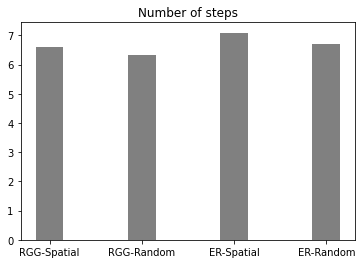

In [100]:
step_nums = []
step_nums.append(statistics.mean(rgg_rgg_data['cas_steps'].values.tolist()))
step_nums.append(statistics.mean(rgg_rand_data['cas_steps'].values.tolist()))
step_nums.append(statistics.mean(rand_rgg_data['cas_steps'].values.tolist()))
step_nums.append(statistics.mean(rand_rand_data['cas_steps'].values.tolist()))

index = np.arange(4)
graph_types = ['RGG-Spatial', 'RGG-Random', 'ER-Spatial', 'ER-Random']

plt.bar(index, step_nums, width=0.3, color='gray')
plt.xticks(index, graph_types)
plt.title('Number of steps')
plt.savefig('The number of steps.png')
plt.show()

In [101]:
rgg_rgg_isol = []
rgg_rgg_unsupp = []
rgg_rand_isol = []
rgg_rand_unsupp = []
rand_rgg_isol = []
rand_rgg_unsupp = []
rand_rand_isol = []
rand_rand_unsupp =[]

In [102]:
index = 1
for col_name in rgg_rgg_data:
    if col_name == ('step%d_isol' % index):
        rgg_rgg_isol.append(statistics.mean(rgg_rgg_data[col_name].values.tolist()))
    if col_name == ('step%d_unsupp' % index):
        rgg_rgg_unsupp.append(statistics.mean(rgg_rgg_data[col_name].values.tolist()))
        index += 1
        
index = 1
for col_name in rgg_rand_data:
    if col_name == ('step%d_isol' % index):
        rgg_rand_isol.append(statistics.mean(rgg_rand_data[col_name].values.tolist()))
    if col_name == ('step%d_unsupp' % index):
        rgg_rand_unsupp.append(statistics.mean(rgg_rand_data[col_name].values.tolist()))
        index += 1
        
index = 1
for col_name in rand_rgg_data:
    if col_name == ('step%d_isol' % index):
        rand_rgg_isol.append(statistics.mean(rand_rgg_data[col_name].values.tolist()))
    if col_name == ('step%d_unsupp' % index):
        rand_rgg_unsupp.append(statistics.mean(rand_rgg_data[col_name].values.tolist()))
        index += 1
        
index = 1
for col_name in rand_rand_data:
    if col_name == ('step%d_isol' % index):
        rand_rand_isol.append(statistics.mean(rand_rand_data[col_name].values.tolist()))
    if col_name == ('step%d_unsupp' % index):
        rand_rand_unsupp.append(statistics.mean(rand_rand_data[col_name].values.tolist()))
        index += 1

In [103]:
print(len(rgg_rgg_isol))
print(len(rgg_rgg_unsupp))
print(len(rgg_rand_isol))
print(len(rgg_rand_unsupp))
print(len(rand_rgg_isol))
print(len(rand_rgg_unsupp))
print(len(rand_rand_isol))
print(len(rand_rand_unsupp))

36
36
36
36
36
36
36
36


In [104]:
cum_rgg_rgg_isol = []
cum_rgg_rgg_unsupp = []
cum_rgg_rand_isol = []
cum_rgg_rand_unsupp = []
cum_rand_rgg_isol = []
cum_rand_rgg_unsupp = []
cum_rand_rand_isol = []
cum_rand_rand_unsupp = []

total = []
for i in range(len(rgg_rgg_isol)):
    if i == 0:
        total.append(rgg_rgg_isol[i])
        total.append(rgg_rgg_unsupp[i])
    else:
        total[0] += rgg_rgg_isol[i]
        total[1] += rgg_rgg_unsupp[i]
    cum_rgg_rgg_isol.append(total[0])
    cum_rgg_rgg_unsupp.append(total[1])
    
total = []
for i in range(len(rgg_rand_isol)):
    if i == 0:
        total.append(rgg_rand_isol[i])
        total.append(rgg_rand_unsupp[i])
    else:
        total[0] += rgg_rand_isol[i]
        total[1] += rgg_rand_unsupp[i]
    cum_rgg_rand_isol.append(total[0])
    cum_rgg_rand_unsupp.append(total[1])
    
total = []
for i in range(len(rand_rgg_isol)):
    if i == 0:
        total.append(rand_rgg_isol[i])
        total.append(rand_rgg_unsupp[i])
    else:
        total[0] += rand_rgg_isol[i]
        total[1] += rand_rgg_unsupp[i]
    cum_rand_rgg_isol.append(total[0])
    cum_rand_rgg_unsupp.append(total[1])
    
total = []
for i in range(len(rand_rand_isol)):
    if i == 0:
        total.append(rand_rand_isol[i])
        total.append(rand_rand_unsupp[i])
    else:
        total[0] += rand_rand_isol[i]
        total[1] += rand_rand_unsupp[i]
    cum_rand_rand_isol.append(total[0])
    cum_rand_rand_unsupp.append(total[1])

## Isolation vs Unsupport

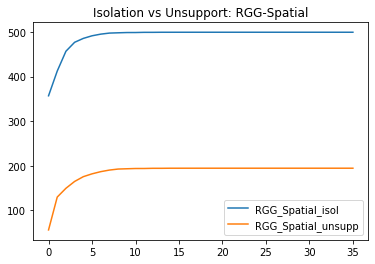

In [105]:
plt.plot(range(len(cum_rgg_rgg_isol)), cum_rgg_rgg_isol)
plt.plot(range(len(cum_rgg_rgg_isol)), cum_rgg_rgg_unsupp)
plt.legend(['RGG_Spatial_isol','RGG_Spatial_unsupp'])
plt.title('Isolation vs Unsupport: RGG-Spatial')
plt.savefig('Isolation vs Unsupport_RGG-RGG.png')
plt.show()

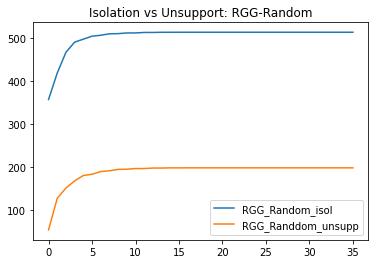

In [106]:
plt.plot(range(len(cum_rgg_rand_isol)), cum_rgg_rand_isol)
plt.plot(range(len(cum_rgg_rand_isol)), cum_rgg_rand_unsupp)
plt.legend(['RGG_Random_isol','RGG_Randdom_unsupp'])
plt.title('Isolation vs Unsupport: RGG-Random')
plt.savefig('Isolation vs Unsupport_RGG-Rand.png')
plt.show()

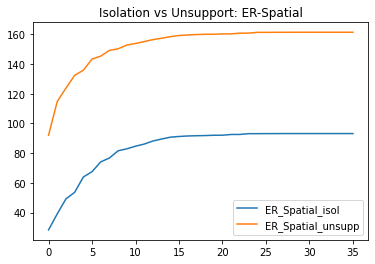

In [107]:
plt.plot(range(len(cum_rand_rgg_isol)), cum_rand_rgg_isol)
plt.plot(range(len(cum_rand_rgg_isol)), cum_rand_rgg_unsupp)
plt.legend(['ER_Spatial_isol','ER_Spatial_unsupp'])
plt.title('Isolation vs Unsupport: ER-Spatial')
plt.savefig('Isolation vs Unsupport_Rand-RGG.png')
plt.show()

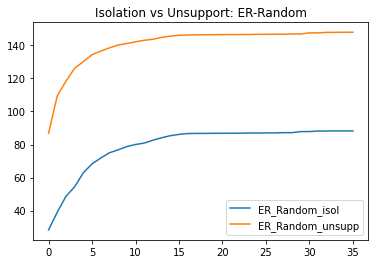

In [108]:
plt.plot(range(len(cum_rand_rand_isol)), cum_rand_rand_isol)
plt.plot(range(len(cum_rand_rand_isol)), cum_rand_rand_unsupp)
plt.legend(['ER_Random_isol','ER_Random_unsupp'])
plt.title('Isolation vs Unsupport: ER-Random')
plt.savefig('Isolation vs Unsupport_Rand-Rand.png')
plt.show()

In [16]:
df_len = []

df_len.append(list(rgg_rgg_isol))
df_len.append(list(rgg_rand_isol))
df_len.append(list(rand_rgg_isol))
df_len.append(list(rand_rand_isol))

max_df_len = max(df_len, key=len)

x_val = list(range(len(max_df_len)))

In [17]:
proc_isol = []
proc_unsupp = []

proc_isol.append(cum_rgg_rgg_isol)
proc_isol.append(cum_rgg_rand_isol)
proc_isol.append(cum_rand_rgg_isol)
proc_isol.append(cum_rand_rand_isol)

proc_unsupp.append(cum_rgg_rgg_unsupp)
proc_unsupp.append(cum_rgg_rand_unsupp)
proc_unsupp.append(cum_rand_rgg_unsupp)
proc_unsupp.append(cum_rand_rand_unsupp)

for x in x_val:
    if len(rgg_rgg_isol) <= x:
        proc_isol[0].append(cum_rgg_rgg_isol[len(rgg_rgg_isol) - 1])
        proc_unsupp[0].append(cum_rgg_rgg_unsupp[len(rgg_rgg_isol) - 1])
    if len(rgg_rand_isol) <= x:
        proc_isol[1].append(cum_rgg_rand_isol[len(rgg_rand_isol) - 1])
        proc_unsupp[1].append(cum_rgg_rand_unsupp[len(rgg_rand_isol) - 1])
    if len(rand_rgg_isol) <= x:
        proc_isol[2].append(cum_rand_rgg_isol[len(rand_rgg_isol) - 1])
        proc_unsupp[2].append(cum_rand_rgg_unsupp[len(rand_rgg_isol) - 1])
    if len(rand_rand_isol) <= x:
        proc_isol[3].append(cum_rand_rand_isol[len(rand_rand_isol) - 1])
        proc_unsupp[3].append(cum_rand_rand_unsupp[len(rand_rand_isol) - 1])

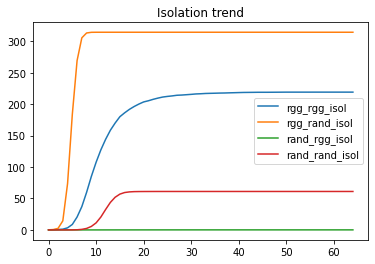

In [18]:
plt.plot(x_val, proc_isol[0])
plt.plot(x_val, proc_isol[1])
plt.plot(x_val, proc_isol[2])
plt.plot(x_val, proc_isol[3])
plt.legend(['rgg_rgg_isol','rgg_rand_isol', 'rand_rgg_isol', 'rand_rand_isol'])
plt.title('Isolation trend')
plt.show()

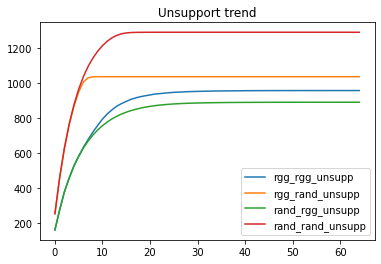

In [19]:
plt.plot(x_val, proc_unsupp[0])
plt.plot(x_val, proc_unsupp[1])
plt.plot(x_val, proc_unsupp[2])
plt.plot(x_val, proc_unsupp[3])
plt.legend(['rgg_rgg_unsupp','rgg_rand_unsupp', 'rand_rgg_unsupp', 'rand_rand_unsupp'])
plt.title('Unsupport trend')
plt.show()

## Pie Chart

In [20]:
init_death = 150
labels = ['Alive nodes', 'Initial death', 'Dead nodes from isolation', 'Dead nodes from unsupport']

alive = []
alive.append(statistics.mean(rgg_rgg_data['alive_nodes']))
alive.append(statistics.mean(rgg_rand_data['alive_nodes']))
alive.append(statistics.mean(rand_rgg_data['alive_nodes']))
alive.append(statistics.mean(rand_rand_data['alive_nodes']))

tot_isol = []
tot_isol.append(statistics.mean(rgg_rgg_data['tot_isol_node']))
tot_isol.append(statistics.mean(rgg_rand_data['tot_isol_node']))
tot_isol.append(statistics.mean(rand_rgg_data['tot_isol_node']))
tot_isol.append(statistics.mean(rand_rand_data['tot_isol_node']))

tot_unsupp = []
tot_unsupp.append(statistics.mean(rgg_rgg_data['tot_unsupp_node']))
tot_unsupp.append(statistics.mean(rgg_rand_data['tot_unsupp_node']))
tot_unsupp.append(statistics.mean(rand_rgg_data['tot_unsupp_node']))
tot_unsupp.append(statistics.mean(rand_rand_data['tot_unsupp_node']))

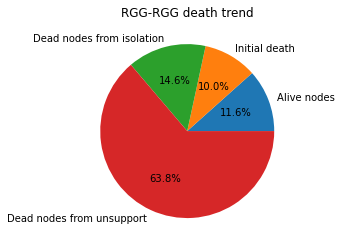

In [21]:
deaths = [alive[0], init_death, tot_isol[0], tot_unsupp[0]]

plt.pie(deaths, labels=labels, autopct='%.1f%%')
plt.title('RGG-RGG death trend')
plt.show()

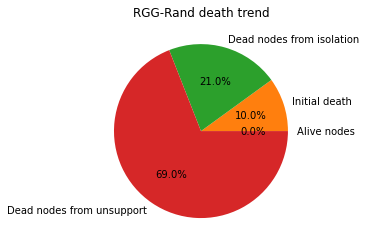

In [22]:
deaths = [alive[1], init_death, tot_isol[1], tot_unsupp[1]]

plt.pie(deaths, labels=labels, autopct='%.1f%%')
plt.title('RGG-Rand death trend')
plt.show()

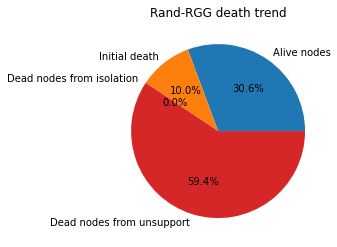

In [23]:
deaths = [alive[2], init_death, tot_isol[2], tot_unsupp[2]]

plt.pie(deaths, labels=labels, autopct='%.1f%%')
plt.title('Rand-RGG death trend')
plt.show()

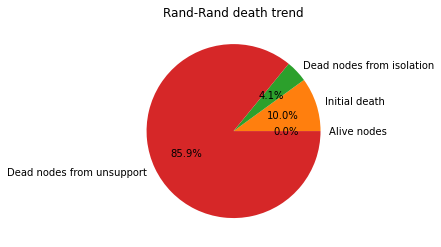

In [24]:
deaths = [alive[3], init_death, tot_isol[3], tot_unsupp[3]]

plt.pie(deaths, labels=labels, autopct='%.1f%%')
plt.title('Rand-Rand death trend')
plt.show()

## Compute the number of nodes

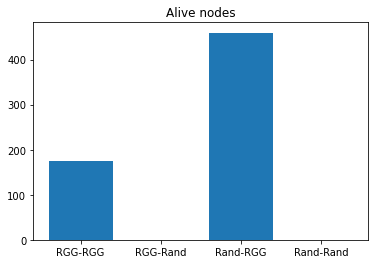

In [25]:
x_val = np.arange(4)
labels = ['initial', 'final']

plt.bar(x_val, alive)
plt.xticks(x_val, graph_types)
plt.title('Alive nodes')
plt.savefig('alive nodes.png')
plt.show()

## Compare the number of edges

In [26]:
init_intra = []
init_intra.append(statistics.mean(rgg_rgg_data['init_intra_edge']))
init_intra.append(statistics.mean(rgg_rand_data['init_intra_edge']))
init_intra.append(statistics.mean(rand_rgg_data['init_intra_edge']))
init_intra.append(statistics.mean(rand_rand_data['init_intra_edge']))

init_inter = []
init_inter.append(statistics.mean(rgg_rgg_data['init_inter_edge']))
init_inter.append(statistics.mean(rgg_rand_data['init_inter_edge']))
init_inter.append(statistics.mean(rand_rgg_data['init_inter_edge']))
init_inter.append(statistics.mean(rand_rand_data['init_inter_edge']))

init_supp = []
init_supp.append(statistics.mean(rgg_rgg_data['init_supp_edge']))
init_supp.append(statistics.mean(rgg_rand_data['init_supp_edge']))
init_supp.append(statistics.mean(rand_rgg_data['init_supp_edge']))
init_supp.append(statistics.mean(rand_rand_data['init_supp_edge']))

fin_intra = []
fin_intra.append(statistics.mean(rgg_rgg_data['fin_intra_edge']))
fin_intra.append(statistics.mean(rgg_rand_data['fin_intra_edge']))
fin_intra.append(statistics.mean(rand_rgg_data['fin_intra_edge']))
fin_intra.append(statistics.mean(rand_rand_data['fin_intra_edge']))

fin_inter = []
fin_inter.append(statistics.mean(rgg_rgg_data['fin_inter_edge']))
fin_inter.append(statistics.mean(rgg_rand_data['fin_inter_edge']))
fin_inter.append(statistics.mean(rand_rgg_data['fin_inter_edge']))
fin_inter.append(statistics.mean(rand_rand_data['fin_inter_edge']))

fin_supp = []
fin_supp.append(statistics.mean(rgg_rgg_data['fin_supp_edge']))
fin_supp.append(statistics.mean(rgg_rand_data['fin_supp_edge']))
fin_supp.append(statistics.mean(rand_rgg_data['fin_supp_edge']))
fin_supp.append(statistics.mean(rand_rand_data['fin_supp_edge']))

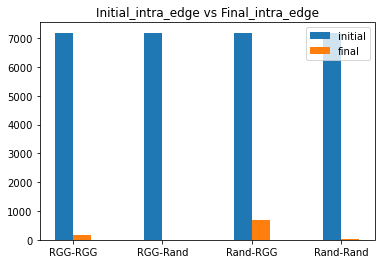

In [27]:
plt.bar(x_val-0.1, init_intra, width=0.2)
plt.bar(x_val+0.1, fin_intra, width=0.2)
plt.legend(labels)
plt.xticks(x_val, graph_types)
plt.title('Initial_intra_edge vs Final_intra_edge')
plt.show()

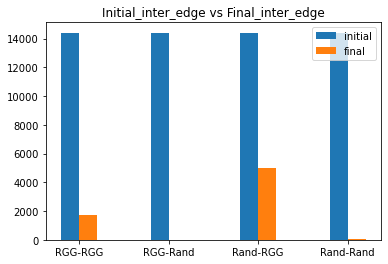

In [28]:
plt.bar(x_val-0.1, init_inter, width=0.2)
plt.bar(x_val+0.1, fin_inter, width=0.2)
plt.legend(labels)
plt.xticks(x_val, graph_types)
plt.title('Initial_inter_edge vs Final_inter_edge')
plt.show()

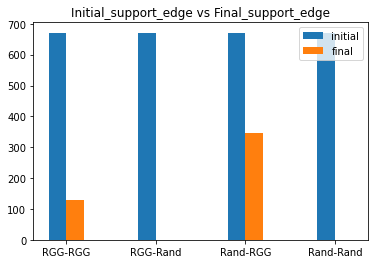

In [29]:
plt.bar(x_val-0.1, init_supp, width=0.2)
plt.bar(x_val+0.1, fin_supp, width=0.2)
plt.legend(labels)
plt.xticks(x_val, graph_types)
plt.title('Initial_support_edge vs Final_support_edge')
plt.show()

## Network Analysis

In [30]:
init_far = []
init_far.append(statistics.mean(rgg_rgg_data['init_far_node']))
init_far.append(statistics.mean(rgg_rand_data['init_far_node']))
init_far.append(statistics.mean(rand_rgg_data['init_far_node']))
init_far.append(statistics.mean(rand_rand_data['init_far_node']))

fin_far = []
fin_far.append(statistics.mean(rgg_rgg_data['fin_far_node']))
fin_far.append(statistics.mean(rgg_rand_data['fin_far_node']))
fin_far.append(statistics.mean(rand_rgg_data['fin_far_node']))
fin_far.append(statistics.mean(rand_rand_data['fin_far_node']))

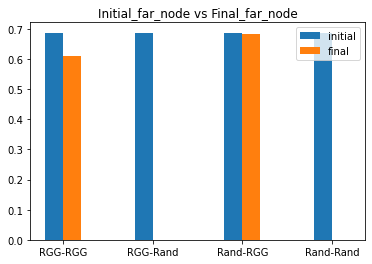

In [31]:
plt.bar(x_val-0.1, init_far, width=0.2)
plt.bar(x_val+0.1, fin_far, width=0.2)
plt.legend(labels)
plt.xticks(x_val, graph_types)
plt.title('Initial_far_node vs Final_far_node')
plt.show()

In [32]:
init_clust = []
init_clust.append(statistics.mean(rgg_rgg_data['init_clust']))
init_clust.append(statistics.mean(rgg_rand_data['init_clust']))
init_clust.append(statistics.mean(rand_rgg_data['init_clust']))
init_clust.append(statistics.mean(rand_rand_data['init_clust']))

fin_clust = []
fin_clust.append(statistics.mean(rgg_rgg_data['fin_clust']))
fin_clust.append(statistics.mean(rgg_rand_data['fin_clust']))
fin_clust.append(statistics.mean(rand_rgg_data['fin_clust']))
fin_clust.append(statistics.mean(rand_rand_data['fin_clust']))

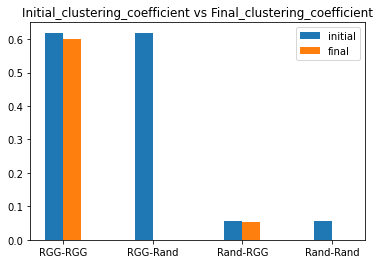

In [33]:
plt.bar(x_val-0.1, init_clust, width=0.2)
plt.bar(x_val+0.1, fin_clust, width=0.2)
plt.legend(labels)
plt.xticks(x_val, graph_types)
plt.title('Initial_clustering_coefficient vs Final_clustering_coefficient')
plt.show()

In [34]:
init_mean_deg = []
init_mean_deg.append(statistics.mean(rgg_rgg_data['init_mean_deg']))
init_mean_deg.append(statistics.mean(rgg_rand_data['init_mean_deg']))
init_mean_deg.append(statistics.mean(rand_rgg_data['init_mean_deg']))
init_mean_deg.append(statistics.mean(rand_rand_data['init_mean_deg']))

fin_mean_deg = []
fin_mean_deg.append(statistics.mean(rgg_rgg_data['fin_mean_deg']))
fin_mean_deg.append(statistics.mean(rgg_rand_data['fin_mean_deg']))
fin_mean_deg.append(statistics.mean(rand_rgg_data['fin_mean_deg']))
fin_mean_deg.append(statistics.mean(rand_rand_data['fin_mean_deg']))

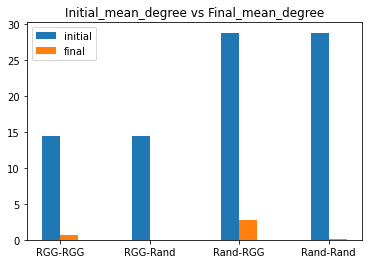

In [35]:
plt.bar(x_val-0.1, init_mean_deg, width=0.2)
plt.bar(x_val+0.1, fin_mean_deg, width=0.2)
plt.legend(labels)
plt.xticks(x_val, graph_types)
plt.title('Initial_mean_degree vs Final_mean_degree')
plt.show()

In [36]:
init_larg_comp = []
init_larg_comp.append(statistics.mean(rgg_rgg_data['init_larg_comp']))
init_larg_comp.append(statistics.mean(rgg_rand_data['init_larg_comp']))
init_larg_comp.append(statistics.mean(rand_rgg_data['init_larg_comp']))
init_larg_comp.append(statistics.mean(rand_rand_data['init_larg_comp']))

fin_larg_comp = []
fin_larg_comp.append(statistics.mean(rgg_rgg_data['fin_larg_comp']))
fin_larg_comp.append(statistics.mean(rgg_rand_data['fin_larg_comp']))
fin_larg_comp.append(statistics.mean(rand_rgg_data['fin_larg_comp']))
fin_larg_comp.append(statistics.mean(rand_rand_data['fin_larg_comp']))

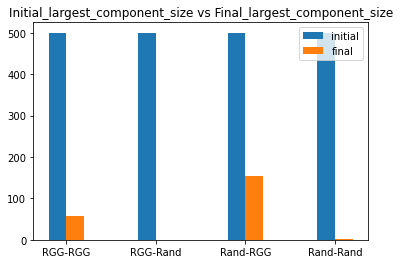

In [37]:
plt.bar(x_val-0.1, init_larg_comp, width=0.2)
plt.bar(x_val+0.1, fin_larg_comp, width=0.2)
plt.legend(labels)
plt.xticks(x_val, graph_types)
plt.title('Initial_largest_component_size vs Final_largest_component_size')
plt.show()

In [38]:
deg_assort = []

a = rgg_rgg_data['deg_assort'].fillna(0)
b = rgg_rand_data['deg_assort'].fillna(0)
c = rand_rgg_data['deg_assort'].fillna(0)
d = rand_rand_data['deg_assort'].fillna(0)

deg_assort.append(statistics.mean(a))
deg_assort.append(statistics.mean(b))
deg_assort.append(statistics.mean(c))
deg_assort.append(statistics.mean(d))

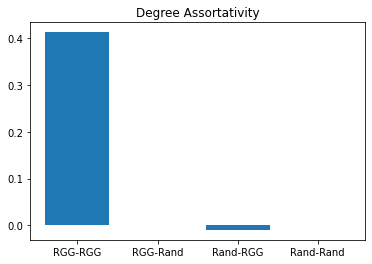

In [39]:
plt.bar(x_val, deg_assort)
plt.xticks(x_val, graph_types)
plt.title('Degree Assortativity')
plt.show()

In [40]:
dist_deg_cent = []
dist_deg_cent.append(statistics.mean(rgg_rgg_data['dist_deg_cent']))
dist_deg_cent.append(statistics.mean(rgg_rand_data['dist_deg_cent']))
dist_deg_cent.append(statistics.mean(rand_rgg_data['dist_deg_cent']))
dist_deg_cent.append(statistics.mean(rand_rand_data['dist_deg_cent']))

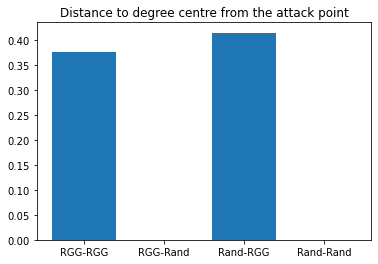

In [41]:
plt.bar(x_val, dist_deg_cent)
plt.xticks(x_val, graph_types)
plt.title('Distance to degree centre from the attack point')
plt.show()

In [42]:
dist_bet_cent = []
dist_bet_cent.append(statistics.mean(rgg_rgg_data['dist_bet_cent']))
dist_bet_cent.append(statistics.mean(rgg_rand_data['dist_bet_cent']))
dist_bet_cent.append(statistics.mean(rand_rgg_data['dist_bet_cent']))
dist_bet_cent.append(statistics.mean(rand_rand_data['dist_bet_cent']))

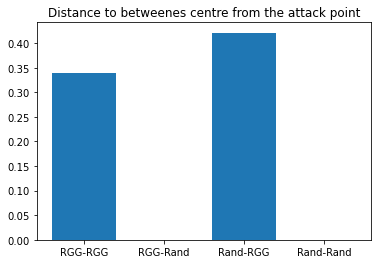

In [43]:
plt.bar(x_val, dist_bet_cent)
plt.xticks(x_val, graph_types)
plt.title('Distance to betweenes centre from the attack point')
plt.show()